# Exploration

In this notebook the different datasets provided by the medical institution are explored with the intention of getting a general understanding of the information we have at our disposal.

We want to explore which data is avaiable in each table and how the different tables are connected to each other. We  also aim to gain an overall understanding of the hospital operations as well as gather some insights regarding what features may be useful for predicting how long a patient will stay hospitalized, which is our final objective.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

##### Import requested packages

In [1]:
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt 
import thesis_lib
from datetime import datetime, date
pd.set_option('display.max_columns', None)  
from thesis_lib.data_processing import *
from thesis_lib.visual import *
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
!pwd

/Users/josefinadallavia/Documents/MIM/Tesis/A-Machine-Learning-Approach-for-Prediction-of-Hospital-Bed-Availability


### Upload data

In [3]:
db = load_parquet('data/parquet_data')

Loading dataset:  laboratory
	 3086085
Loading dataset:  images
	 350403
Loading dataset:  hospitalizations
	 87720
Loading dataset:  surgeries
	 66750
Loading dataset:  sectors_admissions
	 154481
Loading dataset:  hospital_sectors
	 36
Formating integer columns
Formating date columns
Formating time columns
Formating datetime columns


#### Available data

In [4]:
for i,table in enumerate(db.keys()):
    print(i+1,table)
    #print(db[table].columns)
    #print(db[table].info())
    

1 laboratory
2 images
3 hospitalizations
4 surgeries
5 sectors_admissions
6 hospital_sectors


## 1) Hospital Sectors dataset

This dataset contains information of the different Sectors in which the hospital is organized. 

Total no. of sectors is 36. 

Each sector has a code consisting of 3 characters which identifies it. 

Sectores are grouped into 16 'Sector Types'. A list of the different Sector types is presented below

##### Sample view of the sectors df 

In [5]:
sectors = db['hospital_sectors']
sectors.head()

,sector_code,sector_name,sector_type
0,ACV,UNIDAD DE ACV,Unidad de ACV
1,CEG,CUIDADOS ESPEC. EN OBSERVACION,Cuidados especiales Guardia
2,CO3,CORDOBA 3 (INT.GRAL),CORDOBA - Internacion General
3,CO4,CORDOBA 4 (INT.GRAL),CORDOBA - Internacion General
4,CO5,CORDOBA 5 (INT.GRAL),CORDOBA - Internacion General


##### No. of sectors: 

In [6]:
print(str(len(sectors.sector_code.unique())))

36


##### List of Existing sectors and its codes

In [7]:
sectors[['sector_name','sector_code']]

,sector_name,sector_code
0,UNIDAD DE ACV,ACV
1,CUIDADOS ESPEC. EN OBSERVACION,CEG
2,CORDOBA 3 (INT.GRAL),CO3
3,CORDOBA 4 (INT.GRAL),CO4
4,CORDOBA 5 (INT.GRAL),CO5
5,CORDOBA 6 (INT.GRAL),CO6
6,CORDOBA 7 (INT. GRAL),CO7
7,CORDOBA 8 (INT. GRAL),CO8
8,EMERGENCIAS - CEG,EME
9,HEMOTERAPIA 4 SS TORRE,H10


##### No. of Sector Types

In [8]:
len(sectors.sector_type.unique())

16

##### Number of Sectors grouped by Sector Type

In [9]:
sectors.groupby('sector_type')['sector_name'].count()

sector_type
(No Agrupado)                       1
CORDOBA - Internacion General       6
Cuidados especiales Guardia         1
Emergencias                         1
Hemoterapia                         1
Internacion Conjunta                1
Internacion Quirurgica Breve        1
Neonatologia                        1
Pediatria                           1
Pre-Partos                          1
TORRE - Internacion general        11
Terapia intensiva                   4
Terapia pediatrica                  2
Unidad Paciente Critico Cronico     1
Unidad coronaria                    2
Unidad de ACV                       1
Name: sector_name, dtype: int64

##### Sectors Structure

In [10]:
sectors_groups = sectors.groupby(by=['sector_type','sector_name']).describe()['sector_code']['top']
pd.DataFrame(sectors_groups)

top
sector_type                     sector_name                        
(No Agrupado)                   PLANTA QUIRURGICA               PQU
CORDOBA - Internacion General   CORDOBA 3 (INT.GRAL)            CO3
                                CORDOBA 4 (INT.GRAL)            CO4
                                CORDOBA 5 (INT.GRAL)            CO5
                                CORDOBA 6 (INT.GRAL)            CO6
                                CORDOBA 7 (INT. GRAL)           CO7
                                CORDOBA 8  (INT. GRAL)          CO8
Cuidados especiales Guardia     CUIDADOS ESPEC. EN OBSERVACION  CEG
Emergencias                     EMERGENCIAS - CEG               EME
Hemoterapia                     HEMOTERAPIA 4 SS TORRE          H10
Internacion Conjunta            INTERNACION CONJUNTA            NUR
Internacion Quirurgica Breve    INT. QUIRURGICA BREVE           IQB
Neonatologia                    TORRE 6 (NEONATOL)              NNT
Pediatria                       TORRE 9 (PED)                   PED
Pre-Partos                      PREPARTO                        PRP
TORRE - Internacion general     TORRE 10 (INT.GRAL)             T10
                                TORRE 11 (INT.GRAL)             T11
                                TORRE 12 (INT.GRAL)             T12
                                TORRE 13 (INT. GRAL.)           T13
                                TORRE 14 (INT.GRAL.)            T14
                                TORRE 15 (INT.GRAL)             T15
                                TORRE 16 (INT.GRAL.-ONCOHEMAT)  T16
                                TORRE 17 (INT.GRAL)             T17
                                TORRE 18 (INT.GRAL)             T18
                                TORRE 19 (INT.GRAL)             T19
                                TORRE 9                         T09
Terapia intensiva               CUIDADOS INTENSIVOS I SECTOR1   UC1
                                CUIDADOS INTENSIVOS I SECTOR2   UC2
                                CUIDADOS INTENSIVOS I SECTOR3   UC3
                                CUIDADOS INTENSIVOS I SECTOR4   UC4
Terapia pediatrica              TORRE 8 (TER. PED)              TEP
                                TORRE 8 (TER.INTERM.PED)        TIP
Unidad Paciente Critico Cronico UNIDAD PACIENTE CRITICO CRONIC  UCR
Unidad coronaria                UNIDAD CORONARIA I              UC6
                                UNIDAD CORONARIA II             UCO
Unidad de ACV                   UNIDAD DE ACV                   ACV

## 2) Hospitalizations dataset

This dataset contains information corresponding to all hospitalizations ocurred between January 2017 - October 2019. 

Each row represents a hospitalization identified by a unique admission number.

Patients are identified by patient id. During his clinic history a patient can have 0 , 1 or more hospitalizations (and then admission numbers) but only one patient id. 

##### Sample view of the dataset

In [11]:
hospitalizations = db['hospitalizations']
#hospitalizations = load_parquet('data/parquet_data','hospitalizations')
hospitalizations.head()


,admission_id,patient_id,age,gender,birth_date,insurance_entity,entity_group,admission_date,admission_time,admission_year,admission_month,origin,admission_physician,admission_sector,last_sector,last_category,isolation,last_room,last_bed,discharge_date,discharge_time,discharge_year,discharge_month,discharge_reason,pre_discharge_date,first_sector,administrative_diagnosis,diagnosis_code,presumptive_dianogsis,discharge_diagnosis_code,discharge_diagnosis,date_registered_discharge,time_registered_discharge,discharge_physician,discharge_summary,discharge_summary_physician,surgery,express_hip_surgery,admission_lenght_days,responsible_sector,second_responsible_sector,emergency_admission_datetime,emergency_service,has_previous_admission,previous_admission_id,previous_admission_date,previous_discharge_date,previous_sector,previous_discharge_dianosis,discharge_ambulance,new_born_weight,new_born_gestation_age,PIM2TEP,high_risk_TEP,low_risk_TEP,ARM_TEP,CEC_TEP,request_number,request_origin,request,request_diagnosis,request_sector,notified,request_user,admission_datetime,discharge_datetime
0,466470-1,3526141-4,79,F,1937-11-15,PAMI UGL VI,PAMI,2017-01-01,02:42:00,2017,Ene,Emergencias,VEDIA VARGAS ANICETA,EME,T16,C,None,1634,2,2017-01-04,18:17:00,2017,Ene,Alta Medica,NaT,T16,DESHIDRATACION,XX2,No Especifica Codigo,276.51,Deshidratacion,2017-01-04,16:47:41,SIMONE MILENA,True,SIMONE MILENA,False,False,3,CLINICA MEDICA,None,NaT,NaN,False,None,NaT,NaT,None,None,True,NaN,0,NaN,NaN,NaN,None,None,NaN,None,None,None,None,None,None,2017-01-01 02:42:00,2017-01-04 18:17:00
1,466471-4,3714597-2,74,F,1942-09-13,PAMI UGL VI,PAMI,2017-01-01,02:48:00,2017,Ene,Emergencias,VEDIA VARGAS ANICETA,EME,UC6,A,*,702,1,2017-01-07,14:03:00,2017,Ene,Alta Medica,NaT,UCO,DIF RESPIRATORIA,XX2,No Especifica Codigo,401.9,Hipertension Arterial No Especificada,2017-01-07,13:42:01,GIARROCCO AGUSTINA,True,GIARROCCO AGUSTINA,False,False,6,CARDIOLOGIA ADULTOS,None,NaT,NaN,False,None,NaT,NaT,None,None,False,NaN,0,NaN,NaN,NaN,None,None,NaN,None,None,None,None,None,None,2017-01-01 02:48:00,2017-01-07 14:03:00
2,466472-7,3714595-2,27,F,1989-11-08,MEDICUS,PREPAGA,2017-01-01,02:46:00,2017,Ene,Guardia,QUIROZ CARINA MAGDALENA,T10,T10,C,None,1020,1,2017-01-01,19:54:00,2017,Ene,Alta Medica,NaT,T10,ABORTO ESPONTANEO,XX2,No Especifica Codigo,634,Aborto Espontaneo,2017-01-01,19:30:56,ABADIA MICAELA,True,ABADIA MICAELA,True,False,1,OBSTETRICIA,None,NaT,NaN,False,None,NaT,NaT,None,None,False,NaN,0,NaN,NaN,NaN,None,None,NaN,None,None,None,None,None,None,2017-01-01 02:46:00,2017-01-01 19:54:00
3,466473-0,3672378-8,85,F,1931-08-09,OSUTHGRA O.S PERSONAL GASTRONOMICO,BRISTOL,2017-01-01,03:55:00,2017,Ene,Emergencias,VEDIA VARGAS ANICETA,EME,T12,C,None,1236,1,2017-01-04,14:58:00,2017,Ene,Alta Medica,NaT,T12,OCLUSION INTESTINAL,789.00,Dolor Abdominal Sitio Inespecificado,620.2,Otros Quistes Ovaricos Y Quister Ovaricos Neom,2017-01-04,14:25:44,CHAVEZ MORA JORGE MARIO,True,CHAVEZ MORA JORGE MARIO,False,False,3,CLINICA MEDICA,None,NaT,NaN,False,None,NaT,NaT,None,None,False,NaN,0,NaN,NaN,NaN,None,None,42736.059525,MESA OPERATIVA,DOM,OCLUSION INTESTINAL,INTERNACION GENERAL,SUP,ABLANCO,2017-01-01 03:55:00,2017-01-04 14:58:00
4,466474-3,3714598-2,34,F,1982-04-06,OSDE,PREPAGA,2017-01-01,05:07:00,2017,Ene,Emergencias,CANIS DIEGO DAMIAN,EME,EME,I,None,6,1,2017-01-01,09:01:00,2017,Ene,Alta Medica,NaT,EME,INTOX. ALCOHOLICA,XX2,No Especifica Codigo,94.68,Desintoxicacion Combinada De Alcohol Y Drogas,2017-01-01,09:01:03,PUENTE MOSQUERA KAROLA,True,PUENTE MOSQUERA KAROLA,False,False,1,None,None,NaT,NaN,False,None,NaT,NaT,None,None,False,NaN,0,NaN,NaN,NaN,None,None,42736.195347,ANDREA,DOMICILIO,INTOX. ALCOHOLICA,INTERNACION GENERAL,None,ABLANCO,2017-01-01 05:07:00,2017-01-01 09:01:00


In [12]:
hospitalizations.shape

(87720, 66)

For each hospitalization, the following data is available:

##### Available variables

In [13]:
for i in hospitalizations.columns:
    print(i)

admission_id
patient_id
age
gender
birth_date
insurance_entity
entity_group
admission_date
admission_time
admission_year
admission_month
origin
admission_physician
admission_sector
last_sector
last_category
isolation
last_room
last_bed
discharge_date
discharge_time
discharge_year
discharge_month
discharge_reason
pre_discharge_date
first_sector
administrative_diagnosis
diagnosis_code
presumptive_dianogsis
discharge_diagnosis_code
discharge_diagnosis
date_registered_discharge
time_registered_discharge
discharge_physician
discharge_summary
discharge_summary_physician
surgery
express_hip_surgery
admission_lenght_days
responsible_sector
second_responsible_sector
emergency_admission_datetime
emergency_service
has_previous_admission
previous_admission_id
previous_admission_date
previous_discharge_date
previous_sector
previous_discharge_dianosis
discharge_ambulance
new_born_weight
new_born_gestation_age
PIM2TEP
high_risk_TEP
low_risk_TEP
ARM_TEP
CEC_TEP
request_number
request_origin
request
re

### 2.1  Basic stats

##### Total No. of hospitalizations

In [14]:
print(hospitalizations['admission_id'].count())
#Safety check for duplicates
if (hospitalizations['admission_id'].count() != hospitalizations['admission_id'].nunique()):
    print('Warning: There are duplicate rows for hospitalizations')

87720


##### Total No. of patients hospitalized

In [15]:
print(hospitalizations['patient_id'].nunique())

64156


###### Avg. hospitalizacions per patient:

In [16]:
hospitalizations[['admission_id']].count()[0]/hospitalizations[['patient_id']].nunique()[0]

1.3672922252010724

##### Days of data

In [17]:
hospitalizations['admission_date'].nunique()

1045

##### Period of time

In [18]:
print('from: ' +str(hospitalizations['admission_date'].min()))
print('to: '+str(hospitalizations['admission_date'].max()))

from: 2017-01-01
to: 2019-11-11


##### Avg. hospitalizations per day

In [19]:
hospitalizations['admission_id'].nunique()/hospitalizations['admission_date'].nunique()

83.94258373205741

##### Hospitalization duration (hours)

In [20]:
hospitalizations = hospitalizations.loc[~hospitalizations['discharge_date'].isna()]

In [21]:
hospitalizations['length'] = (hospitalizations['discharge_datetime']-hospitalizations['admission_datetime']).astype('timedelta64[h]')

#Avg length
print( 'Avg hospitalization length:', hospitalizations['length'].mean())

#Legth std
print( 'Std. Devation hospitalization length: ',hospitalizations['length'].std())

#Variation coefficient
print( 'Variation coefficient hospitalization length: ',((hospitalizations['length'].std()) / 
                                                           (hospitalizations['length'].mean())))

#Max length
print('Maximum hospitalization length: ', (hospitalizations['length'].max()))

#Min length
print( 'Minimum hospitalization length: ',(hospitalizations['length'].min())) 

Avg hospitalization length: 138.41739626082992
Std. Devation hospitalization length:  370.67014424495716
Variation coefficient hospitalization length:  2.6779158852726614
Maximum hospitalization length:  21500.0
Minimum hospitalization length:  0.0


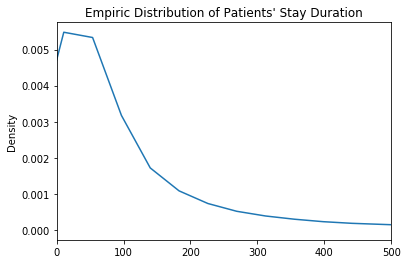

In [22]:
hospitalizations['length'].plot.density(xlim=(0,500), 
                                        title='Empiric Distribution of Patients\' Stay Duration')

Patient's hospitalization lenght presents a right-skewed distribution. The vast majority of patients stay at the hospital between 0 and 150 hours, being the expected value of 138 hours. However, there some outlier on the right tail of the distribution who spend more than a thousand of hours hospitalized.  

### 2.2 Main variables description and visualization

For organization purposes, we will divide this section into different groups of variables with similar characteristics in order to analyze them together:

* `Patients profile`:                                                                                             'age', 'gender', 'insurance_entity', 'entity_group','new_born_weight','new_born_gestation_age',


* `Time features`: 'admission_date', 'admission_time', admission_year', 'admission_month', 'discharge_date', 'discharge_time','discharge_year', 'discharge_month','pre_discharge_date','date_registered_discharge', 'time_registered_discharge','previous_admission_date', 'previous_discharge_date',


* `Diagnosis`:   'administrative_diagnosis','diagnosis_code','presumptive_dianogsis','discharge_diagnosis_code', 'discharge_diagnosis','high_risk_TEP','low_risk_TEP','request_diagnosis'
     


* `Service`: 'second_responsible_sector','emergency_service','has_previous_admission','discharge_ambulance','admission_sector', 'last_sector','isolation', 'surgery', 'express_hip_surgery','discharge_summary','admission_lenght_days','length,'responsible_sector',


* `Origin`: 'request_origin','origin','request_sector'.


* `Physicians`: 'admission_physician','discharge_physician','discharge_summary_physician',

#### 2.2.1 Patients profile

Data regarding patients' characteristics:

'age', 'gender', 'insurance_entity', 'entity_group','new_born_weight','new_born_gestation_age',

`Age`

Represents the patient's age. 

There is a clear relationship between this variable and the hospitalization length which tells us that older people are hospitalized for a longer time (as far as they are not too old in which case hospitalization length starts to decrease probably due to sooner death).

In contrast, it doesn't look like there is significant variation in the no. of admission by age as the following graph illustrates, except by newborns (age=0) whose frequency is significantly larger due to the fact that all babies are born in hospitals and they remain the first hours/days after birth hospitalized with their moms. 


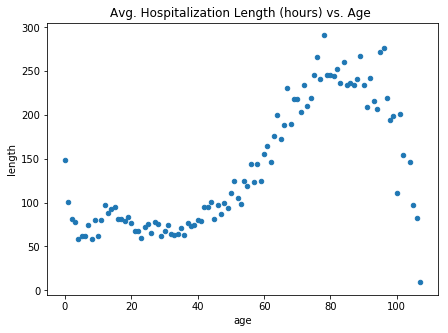

In [23]:
hospitalizations.groupby(['age'], 
                         as_index=False).mean().plot.scatter(x='age', 
                                                            y='length', 
                                                            figsize=(7,5), 
                                                            title="""Avg. Hospitalization Length (hours) vs. Age """ )


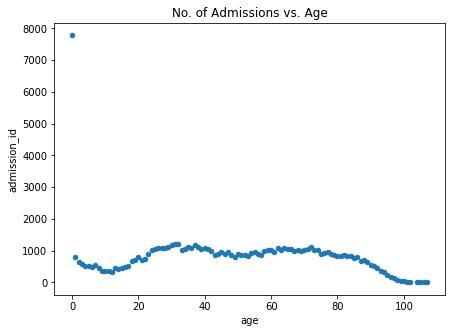

In [24]:
hospitalizations.groupby(['age'], as_index=False).count().plot.scatter(x='age',
                                                                       y='admission_id', 
                                                                       figsize=(7,5), 
                                                                       title='No. of Admissions vs. Age' )


`Gender`

We can say that admissions are more or less equally distributed in terms of gender with a slightly higher proportion of female patients. In terms of hospitalization lenght, men seem to spend a longer time hospitalized than women.

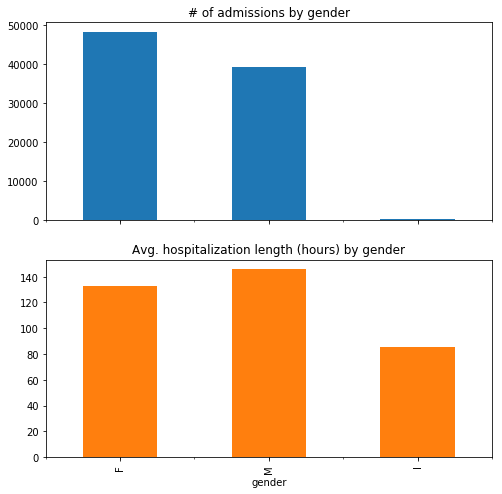

In [25]:
plot_top_categories(hospitalizations, 
                    'gender',
                    3,(8,8),
                    'gender')

`Entity `

Entities represent the different medical coverages the Hospital works with. There are 117 available entities  grouped into 7 types .
No. of admissions differs significantly by entity as well as hospitalization length. 

It is particularly notorious the extremly high expected hospitalization lenght that patients from PAMI show. They more than double the mean hospitalization lenght value.
This was not a surprise for the hospital management team. PAMI is the public health insurance agency for retirees in Argentina and its known for its  burocreatic processes and poor operational performance. As many public agencies in countries where political institutions are weak and public administration is flooded with corruption, PAMI lacks of incentives to be economically efficient, thus deriving in patients being left at the hospital for much more time than needed. 

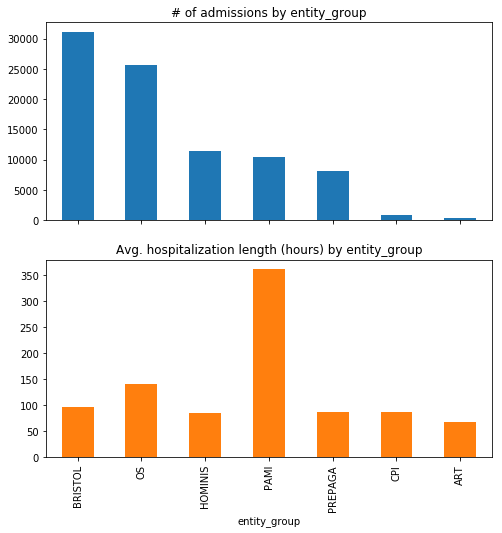

In [26]:
plot_top_categories(hospitalizations,'entity_group',7,(8,8),'entity_group')

#### 2.2.2 Time features

Time data regarding patient's entry and discharge: 

'admission_date', 'admission_time', admission_year', 'admission_month', 'discharge_date', 'discharge_time','discharge_year', 'discharge_month','pre_discharge_date','date_registered_discharge', 'time_registered_discharge','previous_admission_date', 'previous_discharge_date',

`Hour of the day`

As expected, there are almost no activity during the night in terms of patients discharges. In particular, after 8 PM the hospitalized patients outflow decreases dramaticaly. Most discharges ocurred betweem 10 AM and 8 PM, with an ascending trend until noon, and a descending trend after it. 

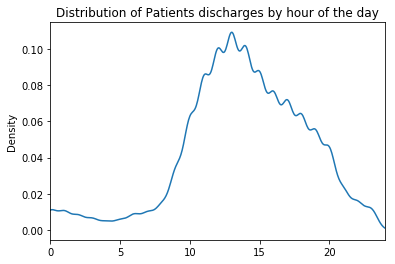

In [27]:
hospitalizations['discharge_datetime'].dt.hour.plot.density(xlim=(0,24), 
                                                            title='Distribution of Patients discharges by hour of the day')

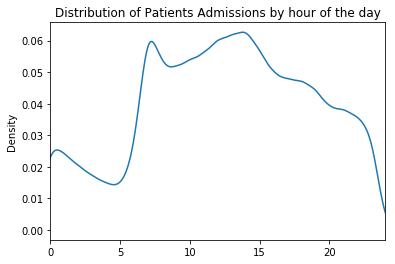

In [28]:
hospitalizations['admission_datetime'].dt.hour.plot.density(xlim=(0,24), 
                                                        title='Distribution of Patients Admissions by hour of the day')

`Day of the week`

Similarly, during the weekends (days 5 & 6) there are signicantly less discharges as well as admissions. Monday is still a day low activity in terms of discharges relative to the average weekday (≈ 12.5 K ) and then the total number of discharges starts to raise. The pick is on Fridays when discharges rose 17 K. Admissions, in contrast, remain quite stable during weekdays.

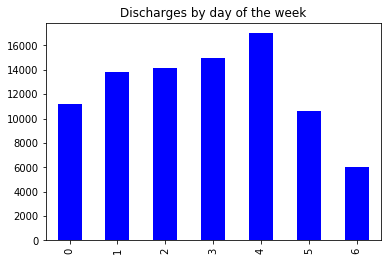

In [29]:
hospitalizations['discharge_datetime'].dt.weekday.value_counts().sort_index().plot.bar(
    title='Discharges by day of the week',color = 'blue')

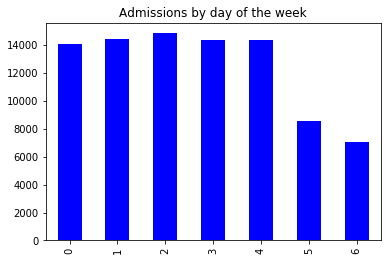

In [30]:
hospitalizations['admission_datetime'].dt.weekday.value_counts().sort_index().plot.bar(
    title='Admissions by day of the week', color = 'blue')

In terms of hospitalization lengt, patients who are hospitalized during weekends, have a significantly larger stay at the hospital. There are two hypothesis that may explain this pattern:
* on one hand, it may be that treatment of these patients is delayed due to the fact that they are admitted during the weekend, thus several services are not available and they have to wait until the week starts to be treated.
* one the other hand, it may be that patients being admitted on weekends are more mostly urgent cases with more difficult conditions than patients who have a prearranged hospitalization.

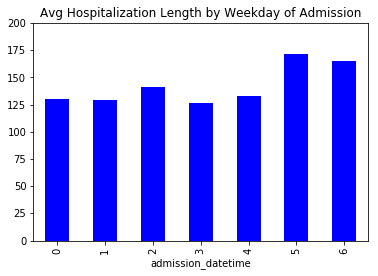

In [31]:
hospitalizations.groupby(
    hospitalizations['admission_datetime'].dt.weekday).mean()['length'].plot.bar(
    title='Avg Hospitalization Length by Weekday of Admission',color = 'blue',
    ylim=(0,200))

`Hospital activity over time`

There is a slightly increasing trend in number of daily admissions over time. This is aligned with the current management team approach which started in mid 2018 and its focused on increasing the hospital utilization levels. 

This trend is accompanied by a similarly increasing trend in daily number of discharges over time. So as a whole we can say that the hospital is having a higher patients turnover over time. 

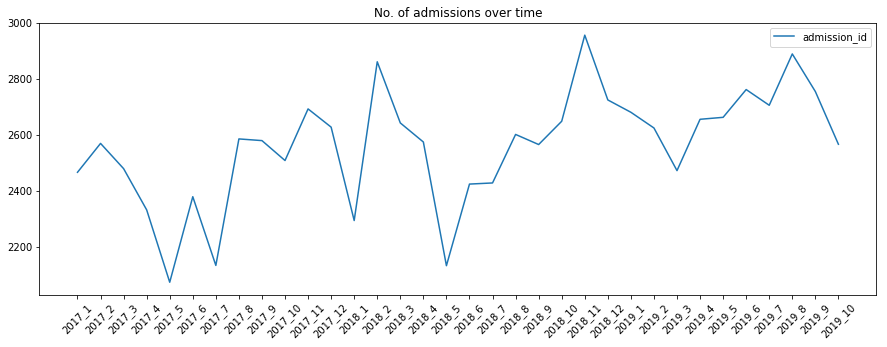

In [32]:
import datetime
hospitalizations['admission_year_month'] = hospitalizations['admission_datetime'].map(lambda x: str(x.year)+'_'+str(x.month))
labels = hospitalizations[hospitalizations['admission_datetime'].dt.date < datetime.date(2019,11,1)]['admission_year_month'].unique()

hospitalizations['discharge_year_month'] = hospitalizations['discharge_datetime'].map(lambda x: str(x.year)+'_'+str(x.month))

labels2 = hospitalizations[hospitalizations['discharge_datetime'].dt.date < datetime.date(2019,11,1)]['discharge_year_month'].unique()

monthly_admissions = hospitalizations[hospitalizations['admission_datetime'].dt.date < datetime.date(2019,11,1)].groupby(
    by= 'admission_year_month',
    as_index=False)['admission_id'].count()

ax = monthly_admissions.plot.line(
                            title='No. of admissions over time',
                            legend=True,
                            figsize=(15,5),
                            xticks=monthly_admissions.index).set_xticklabels(labels,rotation=45)

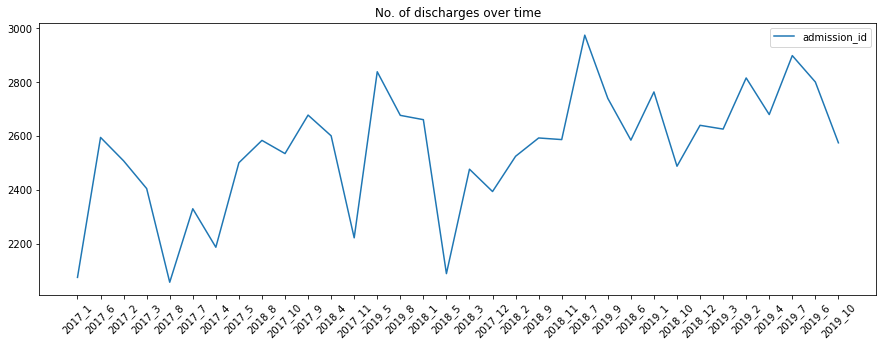

In [33]:
monthly_discharges = hospitalizations[hospitalizations['discharge_datetime'].dt.date < datetime.date(2019,11,1)].groupby(
    by= 'discharge_year_month',
    as_index=False)['admission_id'].count()
ax2 = monthly_discharges.plot.line(title='No. of discharges over time',
                            legend=True,
                            figsize=(15,5),
                            xticks=monthly_discharges.index).set_xticklabels(labels2,rotation=45)

We wanted to understand the imbalances between admissions and discharges as well as the variation in the activity levels across months. 

The following chart shows that summer months are the ones with the lowest levels of activity while months when the cold hits show a greater volume of admissions as well as discharges.

In terms of the relationship between admissions and discharges, we see that most months lye on the line except for a few. January seems to have a positive surplus of patients, while December behaves the opposite way (having more discharges than admissions), which seems to make sense given the peculiarity of those months ih the Southern cone calendar (holidays season -December- and summer vacations -January-).

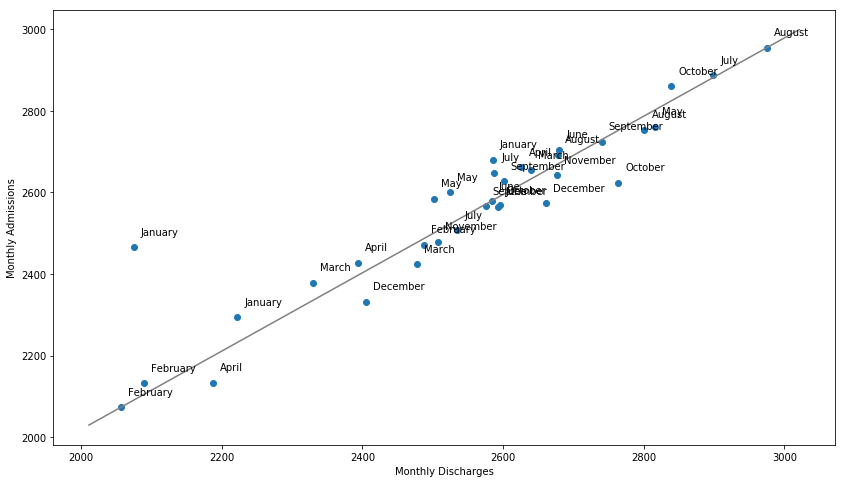

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import calendar

f, ax = plt.subplots(figsize=(14, 8))

tmp = pd.merge(monthly_discharges,monthly_admissions, 
         how='inner',
         left_on='discharge_year_month', 
         right_on = 'admission_year_month')


x = tmp['admission_id_x']
y = tmp['admission_id_y']

ax.scatter(x,y)
labels = [calendar.month_name[int(label[5:])] for label in list(tmp.discharge_year_month)]

ax.set_ylabel('Monthly Admissions')
ax.set_xlabel('Monthly Discharges')

for i, label in enumerate(labels):
    ax.annotate(label, (x[i]+10, y[i]+30))


ax.plot(ax.get_xlim(), ax.get_ylim(), ls="-", c=".5")
plt.show()

#### 2.2.3 Diagnosis

Data related to the patient's diagnosis over his hospitalization:

'administrative_diagnosis','diagnosis_code','presumptive_dianogsis','discharge_diagnosis_code', 'discharge_diagnosis','high_risk_TEP','low_risk_TEP','request_diagnosis'

`request_diagnosis`

This variable represents 

Diagnosis in this variable is not codified, the variable has more than 8 K categories. 

The top 50 categories in terms of admissions have been plot below

In [35]:
len(hospitalizations['request_diagnosis'].unique())

7952

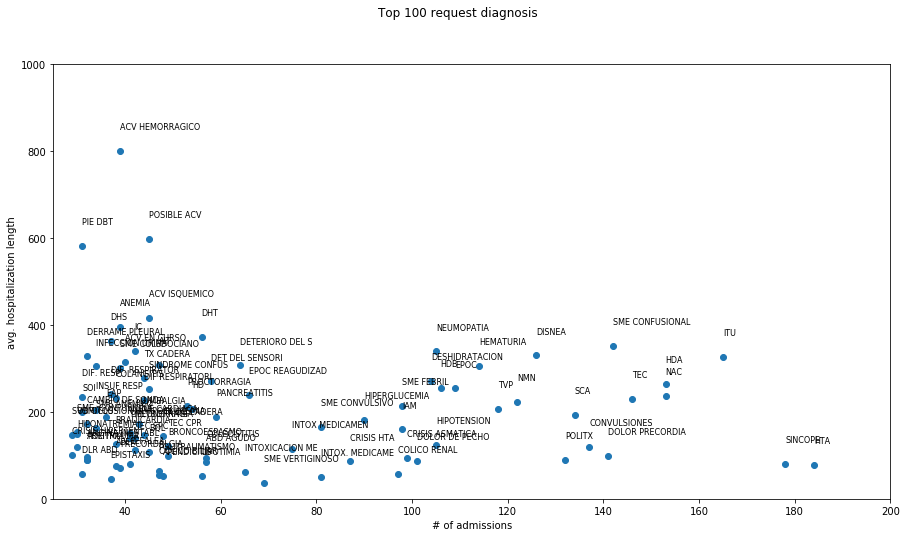

In [36]:
plot_scatter_length_vs_count(hospitalizations,
                             'request_diagnosis',
                             title='Top 100 request diagnosis',
                            xlim=(25,200),
                            ylim=(0,1000),
                            labeled=True,
                            N_rows=100)

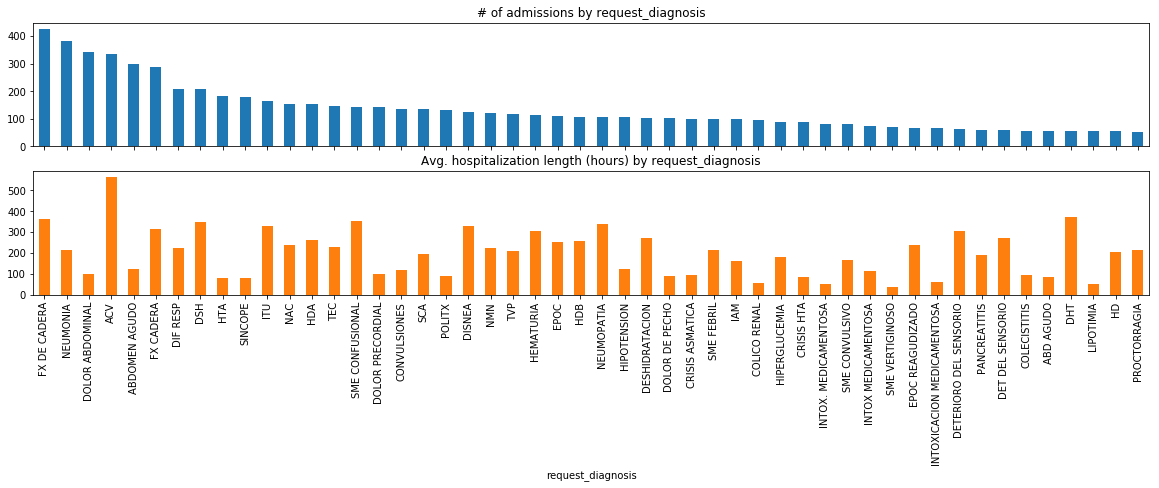

In [37]:
plot_top_categories(hospitalizations,
                    'request_diagnosis',
                    50,(20,5), 
                    'request_diagnosis')

`discharge_diagnosis`

This variable represents the last diagnosis patients have before been discharged.
Diagnosis in this variable is not codified either, the variable has almost 6 K categories.

The top 50 categories in terms of admissions have been plot below.

In [38]:
len(hospitalizations['discharge_diagnosis'].unique())

5793

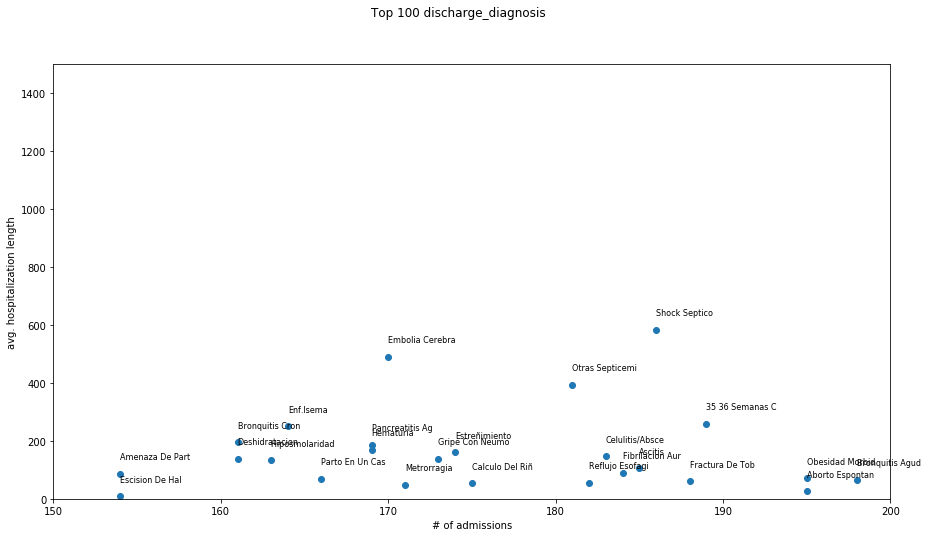

In [39]:
plot_scatter_length_vs_count(hospitalizations,
                             'discharge_diagnosis',
                             title = 'Top 100 discharge_diagnosis',
                             xlim=(150,200),
                             ylim=(0,1500),
                             labeled=True,
                             N_rows=100)

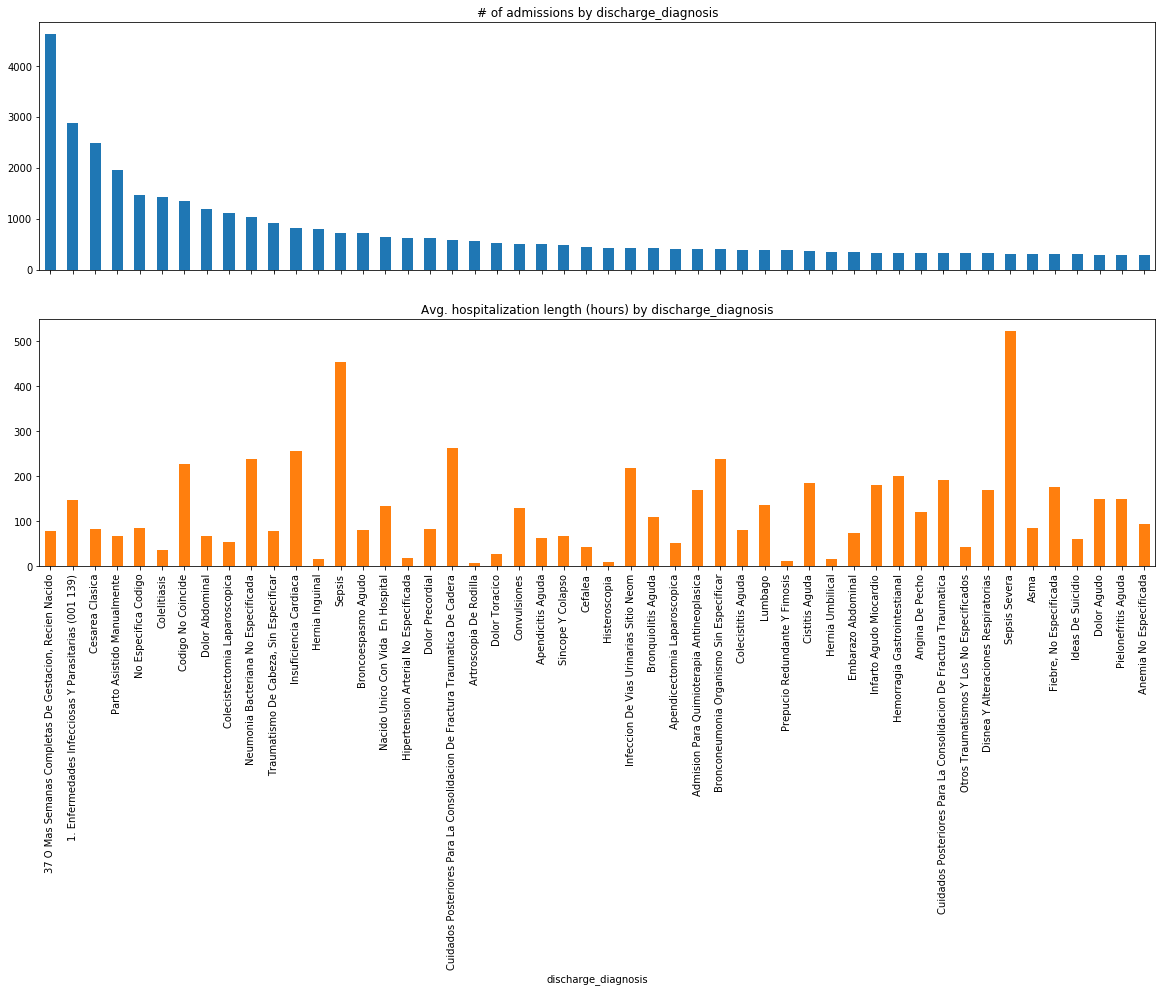

In [42]:
plot_top_categories(hospitalizations,
                    'discharge_diagnosis',
                    50,(20,10),
                    'discharge_diagnosis')

In [43]:
len(hospitalizations['administrative_diagnosis'].unique())

20790

To extract information from uncodified diagnosis data remains quite difficult as was seen above. There are thousands of categories and they do not follow a certain structure, suggesting some aditional techniques as text mining should be necesary to be able to take advantage of these features.

#### 2.2.4 Service


Variables related to the characteristics of the services/treatments received by the patient during his hospitalizacion:

'second_responsible_sector','emergency_service','has_previous_admission','discharge_ambulance','admission_sector', 'last_sector','isolation', 'surgery', 'express_hip_surgery','discharge_summary','admission_lenght_days','length,'responsible_sector',

`surgery`

Indicates whether the patient in consideration underwent a surgery during the hospitalization or not.

False is the mode meaning that most patients hospitalized are not surgically intervened, however there is not a great class imbalance in the distribution. As we would expect, hospitalization length tends to be larger for patients who have been subjected to a surgery.

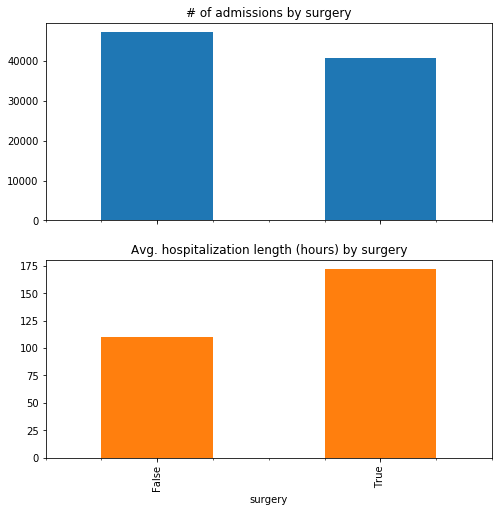

In [44]:
plot_top_categories(hospitalizations,
                    'surgery',
                    2,(8,8),
                    'surgery')

`responsible_sector`

Indicates the hospital sector in charge of the patient hospitalization. There are 62 possible values for this variable.

In [45]:
hospitalizations['responsible_sector'].value_counts()

CLINICA MEDICA                             21587
CIRUGIA GENERAL ADULTOS                     7661
OBSTETRICIA                                 7256
ORTOPEDIA Y TRAUMATOLOGIA                   6930
NEONATOLOGIA                                3873
                                           ...  
DIABETOLOGIA ADULTOS                           1
URODINAMIA                                     1
ENDOSCOPIA                                     1
CUIDADOS PALIATIVOS Y MEDICNA DEL DOLOR        1
NEFROLOGIA INFANTIL                            1
Name: responsible_sector, Length: 62, dtype: int64

Here we have plotted the relationship between number of admissions by sector and average hospitalization length. We wanted to see whether there was or not a bottleneck effect in some sectors (that is, patient's tended to stay longer hospitalized in sector that very busy sectors). 

There is no sign that this happens consistenly. There are some sectors with low number of admissions and greater than average hospitalization length (for example: 'REUMATOLOGIA). There are sectors with higher admission levels and shorter stays (like 'GASTROENTEROLOGIA') and there are sectors which have both a great demand and long hospitalization lenght (as  'UNIDAD DE CUIDADOS INTENSIVOS').

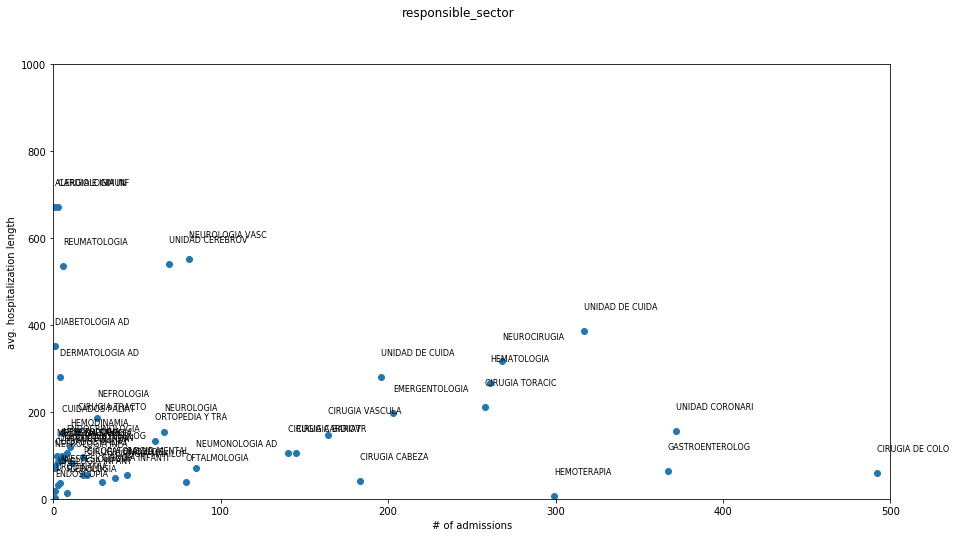

In [46]:
plot_scatter_length_vs_count(hospitalizations,
                             'responsible_sector',
                             xlim=(0,500),
                             ylim=(0,1000),
                             labeled=True) 

`express_hip_surgery`

This variable reflect whether or not the patient has received a hip express surgery. Most patients hospitalized haven't. However having received this type or surgery seems like a good predictor of a longer stay at the hospital.

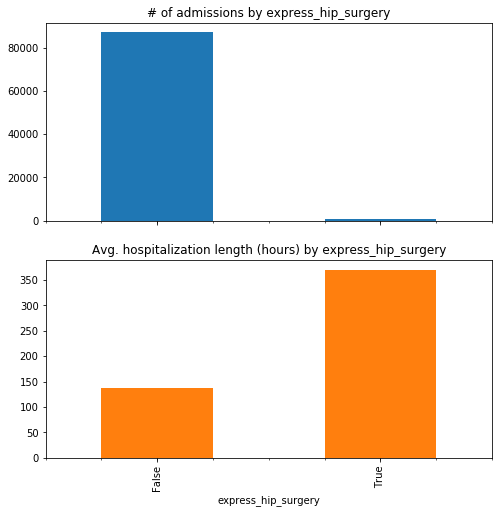

In [47]:
plot_top_categories(hospitalizations, 
                    'express_hip_surgery',
                    2,(8,8),
                    'express_hip_surgery')

#### 2.2.5 Origin

Variables related to where does the patient hospitalization comes from:

'request_origin','origin','request_sector'.

`origin`

Indicates the source of the patient hospitalized.
There are five possibles origins: 
* AMB Urgente: patients coming from ....
* Derivacion: patients that were derived to be hospitalized either from other medical center or some of the hospital areas.
* Emergencias: patients coming from emergency services.
* Guardia: patients that came to the medical guard service and were hospitalized
* Programada: these are scheduled hospitalizations. 

No. of admissions and hospitalization duration vary significantly within the different sources. 
Most patients hospitalized come through emergency sevices and they are the ones that stay longer hospitalized. 
It is particularly interesting to note that scheduled hospitalizations while representing the second most important source of admissions have the lowest hospitalization length. Patients whose hospitalization has been arranged in advance, stay, on average, only two days hospitalized.

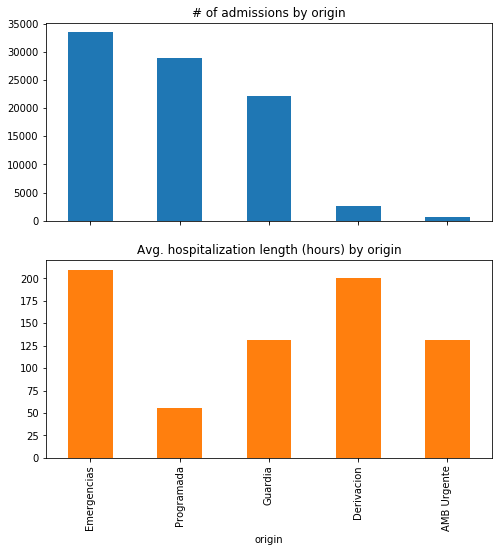

In [48]:
plot_top_categories(hospitalizations,
                    'origin',
                    5,(8,8),
                    'origin')

`request_sector`

Represent which sector of the hospital has indicated the patient's hospitalization. There are 9 available values for this variable.
Most hospitalizations come from the category `INTERNACION GENERAL`. There is great variation in hospitalization duration between different values of this variable. Hospitalizations requested by `TERAPIA INTENSIVA` as well as `NEONATOLOGIA` seems to be a great predictor of a longer stay at the hospital.

In [49]:
len(hospitalizations['request_sector'].unique())

9

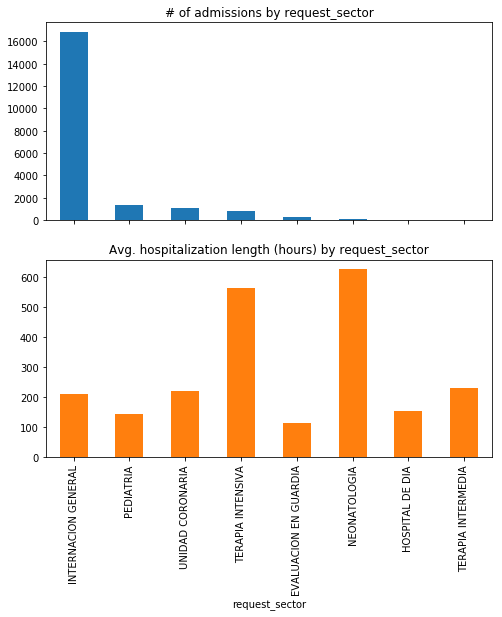

In [50]:
plot_top_categories(hospitalizations, 'request_sector',8,(8,8),'request_sector')

#### 2.2.6 Physicians

Information about the hospital professional that were in charge of the patient during his hospitalization:

'admission_physician','discharge_physician','discharge_summary_physician',

Besides including these categorical variables as they are (which may or may not make sense), we may build physicians embeddings,representing each physician characteritics by crossing this data with the physicians dataset provided by the Hospital management team (with data regarding, for example, the professional specialization, his age, etc) and the historic performance of each physician (like the avg. hospitalization duration of his past patients).

`admission_physician `

In [51]:
hospitalizations['admission_physician'].nunique()

1684

In [52]:
hospitalizations['admission_physician'].value_counts()[:100]

LIBRE ELECCION                      11246
ORTIZ RODRIGUEZ ANA MARIA            1147
MEDICO DE GUARDIA                    1128
ABAD MANUEL                          1126
SALAZAR ALVAREZ  FERNANDO XAVIER      971
                                    ...  
KAPLAN ANDRES                         190
GUIRLAND MELANYE                      189
VALLEJOS MARIA LAURA                  187
PINTOS JULIETA                        184
RECCHIA DANIELA                       182
Name: admission_physician, Length: 100, dtype: int64

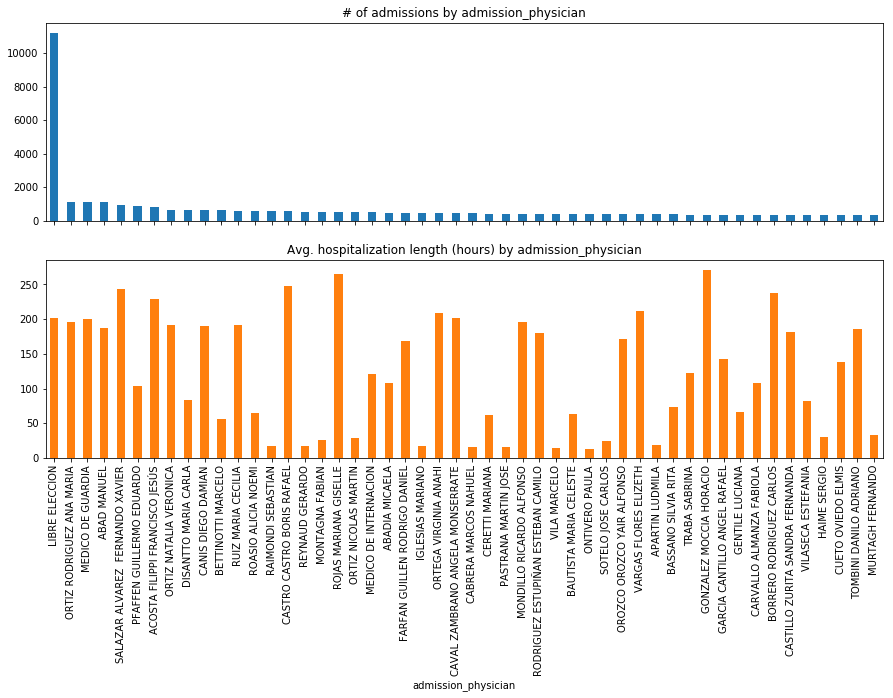

In [53]:
plot_top_categories(hospitalizations, 
                    'admission_physician',
                    50,(15,8),
                    'admission_physician')

`discharge_physician`

In [55]:
len(hospitalizations['discharge_physician'].value_counts())

811

`discharge_summary_physician`

In [56]:
len(hospitalizations['discharge_summary_physician'].value_counts())

765

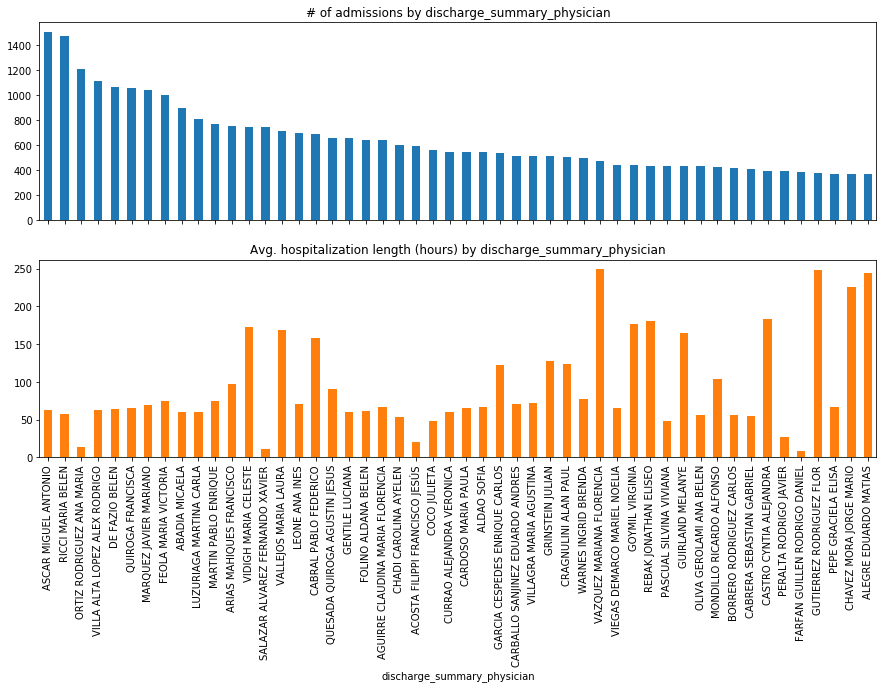

In [57]:
plot_top_categories(hospitalizations,
                    'discharge_summary_physician',
                    50,(15,8),
                    'discharge_summary_physician')

## 3) Images dataset

This dataset contains information regarding the images analysis requested by physicians for the hospital's patients.Each row represent a differente image study performed.

Each image study is linked to a clinic history id and a date. These two variables will let us cross images data with the hospitalizations data in order to know what kind of studies were required and when during the patient hospitalization. 

##### Sample view of the 'images' df

In [58]:
#images = load_parquet('parquet_data','images')
images = db['images']
images.head()

,image_id,image_pun,status,image_date,image_time,image_year-month,sector,admission_id,patient_id,admission_date,discharge_date,entity_id,insurance_entity,entity_group,emergency,type_of_service,requester_name,requester_role,study_code,study_description,no_of_studies
0,35455089,35454865,3,2017-01-01,03:20:00,2017-Ene,EME,466471-4,3714597-2,2017-01-01,2017-01-07,876,PAMI UGL VI,PAMI,1,RAYOS,VEDIA ANICETA,MEDICO DE PISO,34090503,RX C/PORTATIL DE TORAX,1
1,35455101,35454877,3,2017-01-01,03:34:00,2017-Ene,EME,466470-1,3526141-4,2017-01-01,2017-01-04,876,PAMI UGL VI,PAMI,1,RAYOS,VEDIA ANICETA,MEDICO DE PISO,34090503,RX C/PORTATIL DE TORAX,1
2,35455130,35454906,3,2017-01-01,04:26:00,2017-Ene,EME,466471-4,3714597-2,2017-01-01,2017-01-07,876,PAMI UGL VI,PAMI,0,RAYOS,DENNER GERMAN,MEDICO DE PISO,34090503,RX C/PORTATIL DE TORAX,1
3,35455135,35454911,3,2017-01-01,04:31:00,2017-Ene,EME,466473-0,3672378-8,2017-01-01,2017-01-04,948,OSUTHGRA O.S PERSONAL GASTRONOMICO,BRISTOL,1,RAYOS,CANIS DIEGO,MEDICO DE UCI,34042103,"ABDOMEN FRENTE, DE PIE Y ACOSTADO. RX DE",1
4,35455135,35454911,3,2017-01-01,04:31:00,2017-Ene,EME,466473-0,3672378-8,2017-01-01,2017-01-04,948,OSUTHGRA O.S PERSONAL GASTRONOMICO,BRISTOL,1,RAYOS,CANIS DIEGO,MEDICO DE UCI,34090503,RX C/PORTATIL DE TORAX,1


In [59]:
images.shape

(350403, 21)

##### Available variables


In [60]:
for i in images.columns:
    print(i)

image_id
image_pun
status
image_date
image_time
image_year-month
sector
admission_id
patient_id
admission_date
discharge_date
entity_id
insurance_entity
entity_group
emergency
type_of_service
requester_name
requester_role
study_code
study_description
no_of_studies


##### Studies by stype

The most commun type of images studies requested are `RAYOS`.

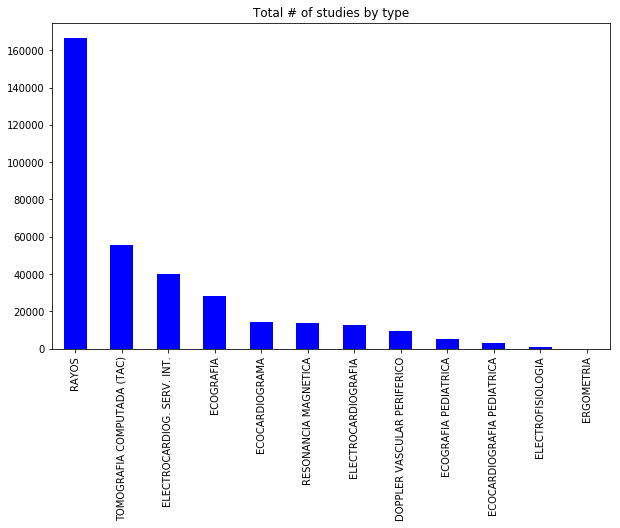

In [61]:
images.type_of_service.value_counts().plot.bar(color='blue',
                                              title = 'Total # of studies by type',
                                              figsize=(10,6))

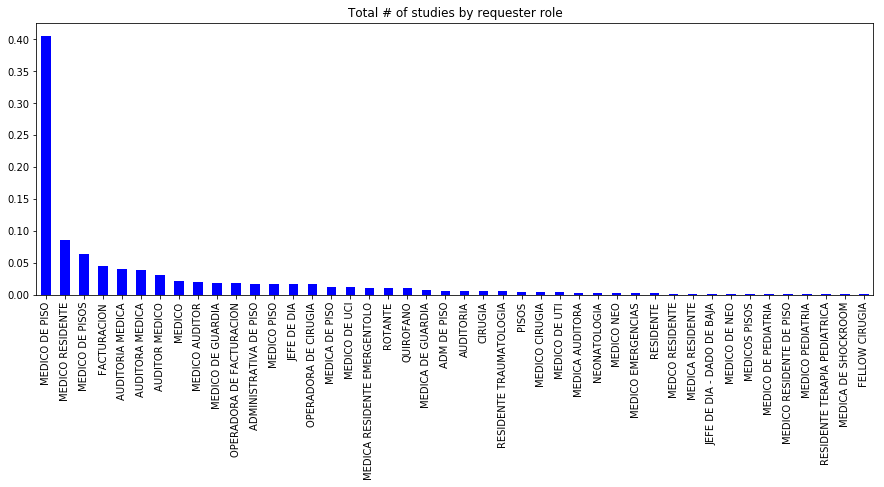

In [62]:
images['requester_role'].value_counts(True)[:-80].plot.bar(
                                                        figsize=(15,5),
                                                        color='blue',
                                                        title='Total # of studies by requester role')

###  Images stats 

##### Average no. of images studies per hospitalization

In [63]:
images.image_id.count()/hospitalizations.admission_id.nunique()

3.994562243502052

##### Average no. of images studies per patient

In [64]:
images.image_id.count()/hospitalizations.patient_id.nunique()

5.461733898622109

In [65]:
mdf = hospitalizations.merge(images, how='left', on='admission_id')

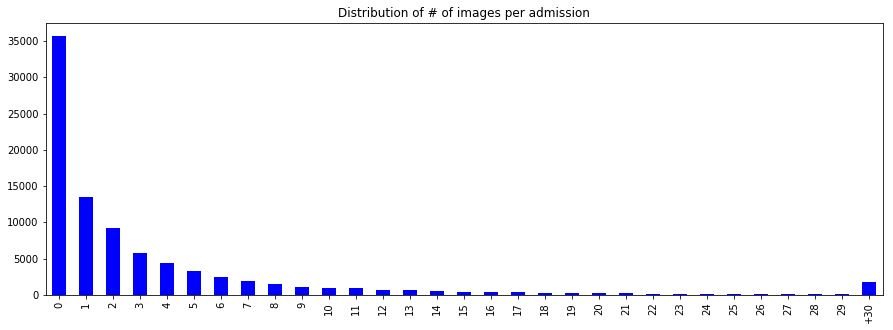

In [66]:
mdf.groupby(
    by='admission_id'
            ).count()['image_id'].apply(lambda x: '+30' 
                                        if x >= 30 else x
                                        ).value_counts(sort=False).plot.bar(
                                                    figsize=(15,5),
                                                    color='blue',
                                                    title='Distribution of # of images per admission')


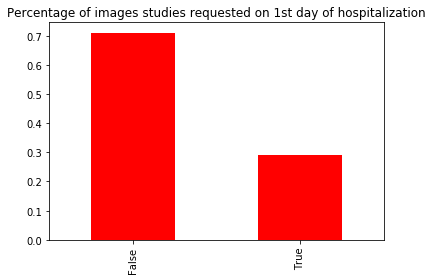

In [75]:
(mdf['image_date'] == mdf['admission_date_x']).value_counts(True).plot.bar(
    title='Percentage of images studies requested on 1st day of hospitalization',
    color='red')

30% of all images studies are requested during the first day of admission

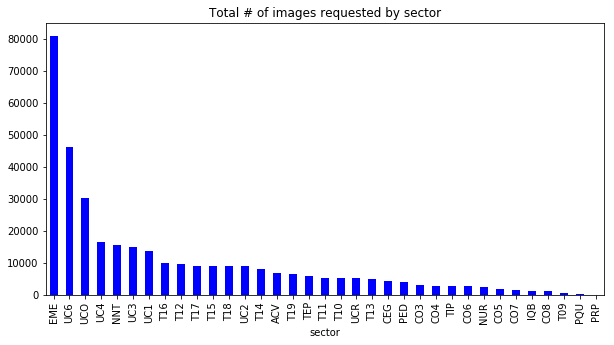

In [68]:
images.groupby(by='sector').count()['admission_id'].sort_values(ascending=False).plot.bar(
                                                            figsize=(10,5),
                                                            color='blue',
                                                            title='Total # of images requested by sector')

The sector which demands the most image studies is `EME`.

There seems to be a positive correlation between the number of images studies requested per admission and its hospitalization length, however the relationship is not linear.

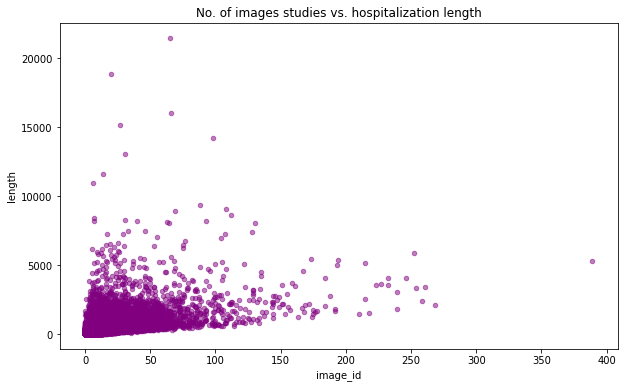

In [69]:
mdf.groupby(by='admission_id'
            ).aggregate({
            'image_id':'count',
            'length': 'mean'}).plot.scatter(y='length',
                                            x = 'image_id',
                                            color='purple',
                                            alpha='.5',
                                            title= 'No. of images studies vs. hospitalization length',
                                            figsize=(10,6))

## 4) Laboratory  dataset 

This dataset contains information regarding the laboratory analysis requested by physicians for the hospital's patients. Each row represent a differente laboratory study performed.
Each study is linked to a clinic history id, an admission id and a date. 

##### Sample view of the dataset

In [70]:
#laboratory = load_parquet('parquet_data','laboratory')
laboratory = db['laboratory']
laboratory.head()

,labo_id,labo_pun,status,labo_date,labo_time,labo_year-month,sector,admission_id,patient_id,admission_date,discharge_date,entity_id,insurance_entity,entity_affiliate_id,entity_group,emergency,requester_name,requester_role,study_code,study_description,no_of_studies
0,35455087,35454863,3,2017-01-01,03:20:00,2017-Ene,EME,466471-4,3714597-2,2017-01-01,2017-01-07,876,PAMI UGL VI,15048873600400,PAMI,1,VEDIA ANICETA,MEDICO DE PISO,171,COAGULOGRAMA BASICO,1
1,35455087,35454863,3,2017-01-01,03:20:00,2017-Ene,EME,466471-4,3714597-2,2017-01-01,2017-01-07,876,PAMI UGL VI,15048873600400,PAMI,1,VEDIA ANICETA,MEDICO DE PISO,190,CPK,1
2,35455087,35454863,3,2017-01-01,03:20:00,2017-Ene,EME,466471-4,3714597-2,2017-01-01,2017-01-07,876,PAMI UGL VI,15048873600400,PAMI,1,VEDIA ANICETA,MEDICO DE PISO,412,GLUCOSA EN SANGRE,1
3,35455087,35454863,3,2017-01-01,03:20:00,2017-Ene,EME,466471-4,3714597-2,2017-01-01,2017-01-07,876,PAMI UGL VI,15048873600400,PAMI,1,VEDIA ANICETA,MEDICO DE PISO,475,HEMOGRAMA,1
4,35455087,35454863,3,2017-01-01,03:20:00,2017-Ene,EME,466471-4,3714597-2,2017-01-01,2017-01-07,876,PAMI UGL VI,15048873600400,PAMI,1,VEDIA ANICETA,MEDICO DE PISO,481,HEPATOGRAMA,1


This is the largest dataset of the hospital database, containing more than 3 million records

In [71]:
laboratory.shape

(3086085, 21)

##### Available variables

In [72]:
for i in laboratory.columns:
    print(i)

labo_id
labo_pun
status
labo_date
labo_time
labo_year-month
sector
admission_id
patient_id
admission_date
discharge_date
entity_id
insurance_entity
entity_affiliate_id
entity_group
emergency
requester_name
requester_role
study_code
study_description
no_of_studies


There are 691 types of laboratoy analysis.

In [73]:
len(laboratory['study_description'].value_counts())

691

The popularity of each type laboratoy analysis differs significantly as the histogram below shows:

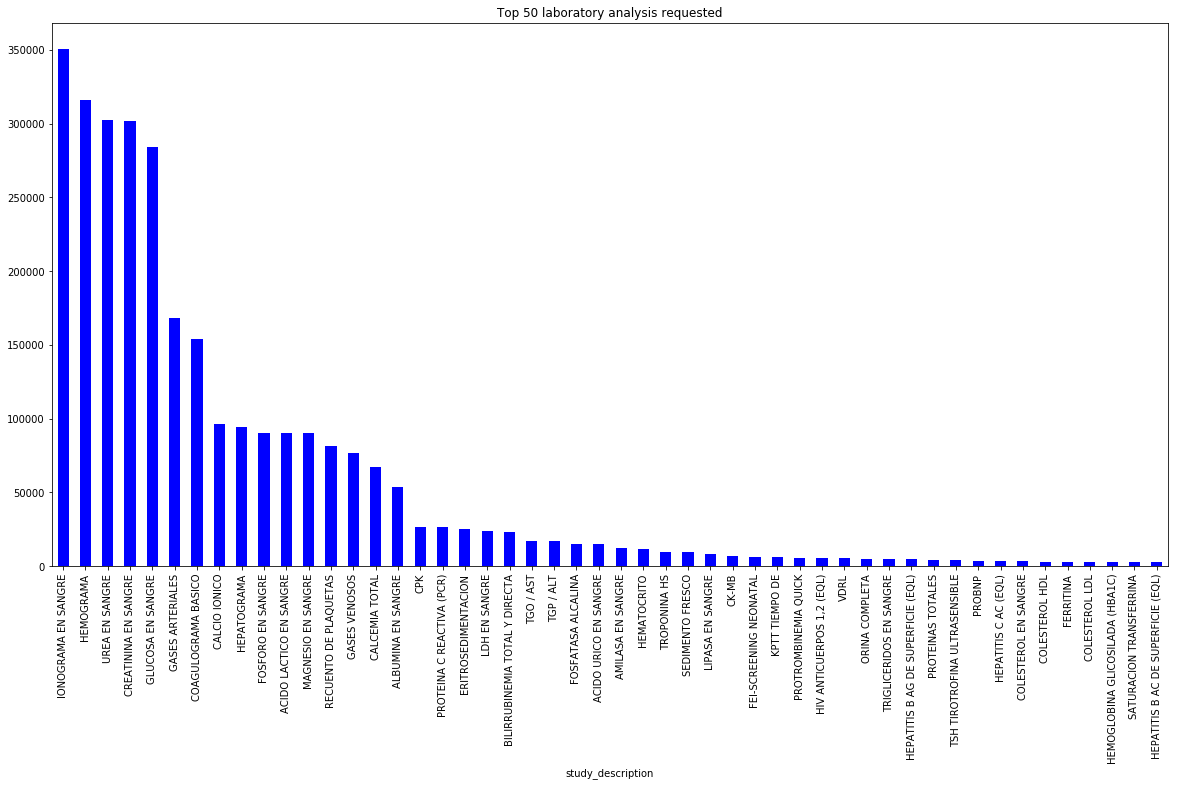

In [74]:
plot_top_categories_count(laboratory,
                          'study_description',
                          50,
                          figsize=(20,10), 
                          title='Top 50 laboratory analysis requested')

Only 20% of laboratory studies are requested on first day of admission.

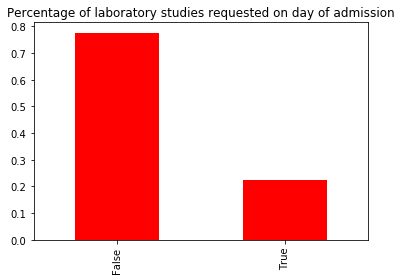

In [139]:
(laboratory['labo_date'] ==laboratory['admission_date']).value_counts(True).plot.bar(
    title='Percentage of laboratory studies requested on day of admission',
    color='red')

`requester role`

As we can see there is a greate inconsistency among en this variable encoding:

In [76]:
laboratory['requester_role'].unique()

array(['MEDICO DE PISO', 'MEDICO DE UCI', 'JEFE DE DIA - DADO DE BAJA',
       'ADM DE PISO', 'MEDICO DE PISOS', 'ROTANTE', 'MEDICO DE GUARDIA',
       'MEDICO CIRUGIA', 'MEDICO EMERGENCIAS', 'ADMINISTRATIVA DE PISO',
       'AUDITORIA MEDICA', 'MEDICO RESIDENTE', 'PISOS OBSTETRICIA',
       'MEDICO', 'MEDICA RESIDENTE EMERGENTOLO', 'ENFERMERIA DE PISO',
       'MEDICO DE NEO', 'MEDICO DE UTI', 'PISOS', 'MEDICA DE PISO',
       'ENFERMERO DE PISO', 'ENFERMERA DE PISO', 'AUDITORIA',
       'MEDICO PISO', 'ENFERMERIA DE GUARDIA', 'AUDITOR MEDICO',
       'JEFE DE DIA', 'MEDICA DE SHOCKROOM', 'MEDICO EMERGENTOLOGO',
       'MEDICOS DE PISO', 'RESIDENTE', 'ENFERMERA DE PISOS',
       'ENFERMERIA DE PISOS', 'MEDICO GUARDIA', 'QUIROFANO',
       'ENFERMERO FRANQUERO', 'MEDICO EXTERNO OSDE', None, 'MEDICO UTI',
       'ENFERMERO DE PEDIATRIA', 'INVESTIGACION', 'IMAGENES',
       'ADMINISTRATIVO DE PISOS', 'MEDICOS PISOS',
       'ADMINISTRATIVA DE PISOS', 'MEDICA DE GUARDIA',
       'MEDICO I

We'll encode this variable by taking only the first four characters of the category name.

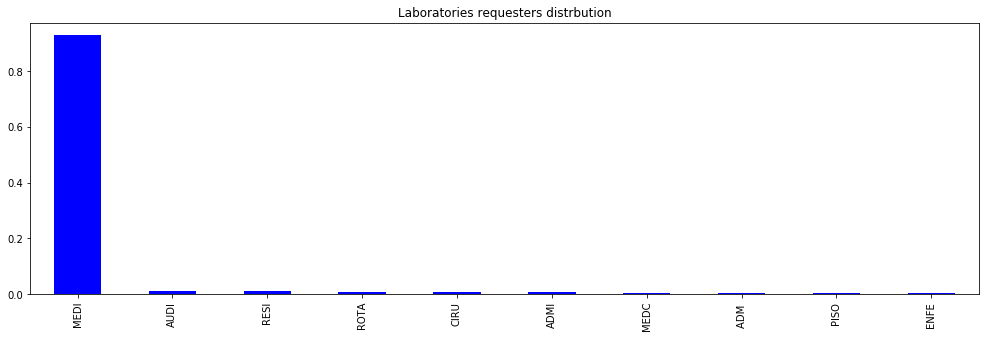

In [77]:
laboratory['requester_encoded'] = laboratory['requester_role'].apply(lambda x: str(x)[:4])
laboratory['requester_encoded'].value_counts(True)[:10].plot.bar(figsize=(17,5),
                                                            color='blue',
                                                              title='Laboratories requesters distrbution')

#### Basic stats about laboratoy

##### Average no. of laboratory studies per hospitalization

In [78]:
laboratory.labo_id.count()/hospitalizations.admission_id.nunique()

35.18108755129959

##### Average no. of laboratory studies per patient

In [79]:
laboratory.labo_id.count()/hospitalizations.patient_id.nunique()

48.10282748301016

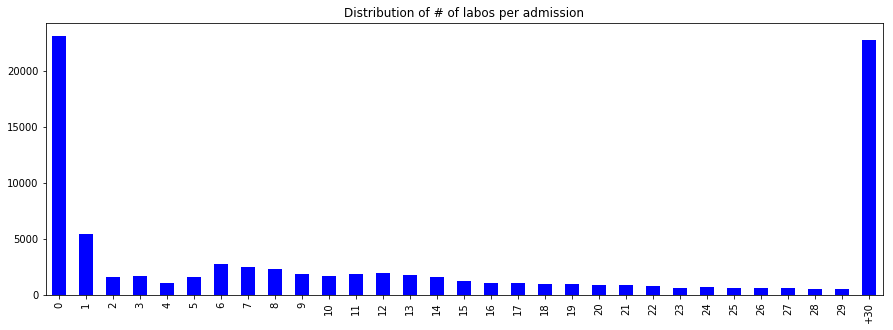

In [80]:
mdf = hospitalizations.merge(laboratory, how='left', on='admission_id')
mdf.groupby(
    by='admission_id'
            ).count()['labo_id'].apply(lambda x: '+30' 
                                        if x >= 30 else x
                                        ).value_counts(sort=False).plot.bar(
                                                    figsize=(15,5),
                                                    color='blue',
                                                    title='Distribution of # of labos per admission')


##### Relationship between # of studies and hospitalization length

As it happens with images, there seems to be a positive correlation between the number of laboratory studies requested per admission for a patient and his hospitalization length, however the relationship is not linear.

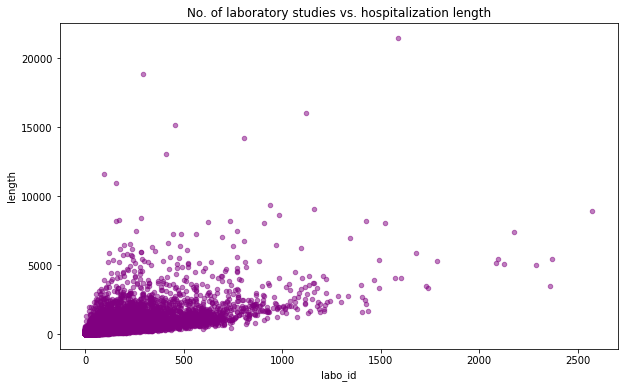

In [81]:
mdf.groupby(by='admission_id'
            ).aggregate({
            'labo_id':'count',
            'length': 'mean'}).plot.scatter(y='length',
                                            x = 'labo_id',
                                            color='purple',
                                            alpha='.5',
                                            title= 'No. of laboratory studies vs. hospitalization length',
                                            figsize=(10,6))

If we now consider the number of studies per study type, the relationship becomes  clear: The highest the number of times THE SAME laboratory study is requested for a certain patient, the longer that patient stays at the hospital, as the graph below illustrates. 

In [82]:
tmp =laboratory[['study_description',
                'admission_id', 
                'labo_id']].merge(hospitalizations[['admission_id', 'length']],
                                  how='left',
                                  on = 'admission_id').groupby('study_description').agg({
                                                                                'labo_id':'count',
                                                                                'length': 'sum',
                                                                                'admission_id': pd.Series.nunique})
tmp['avg_labos_requested_per_hosp']= tmp['labo_id']/tmp['admission_id']
tmp['avg_length']= tmp['length']/tmp['admission_id']
tmp = tmp.sort_values(by='admission_id',ascending=False).head(100)


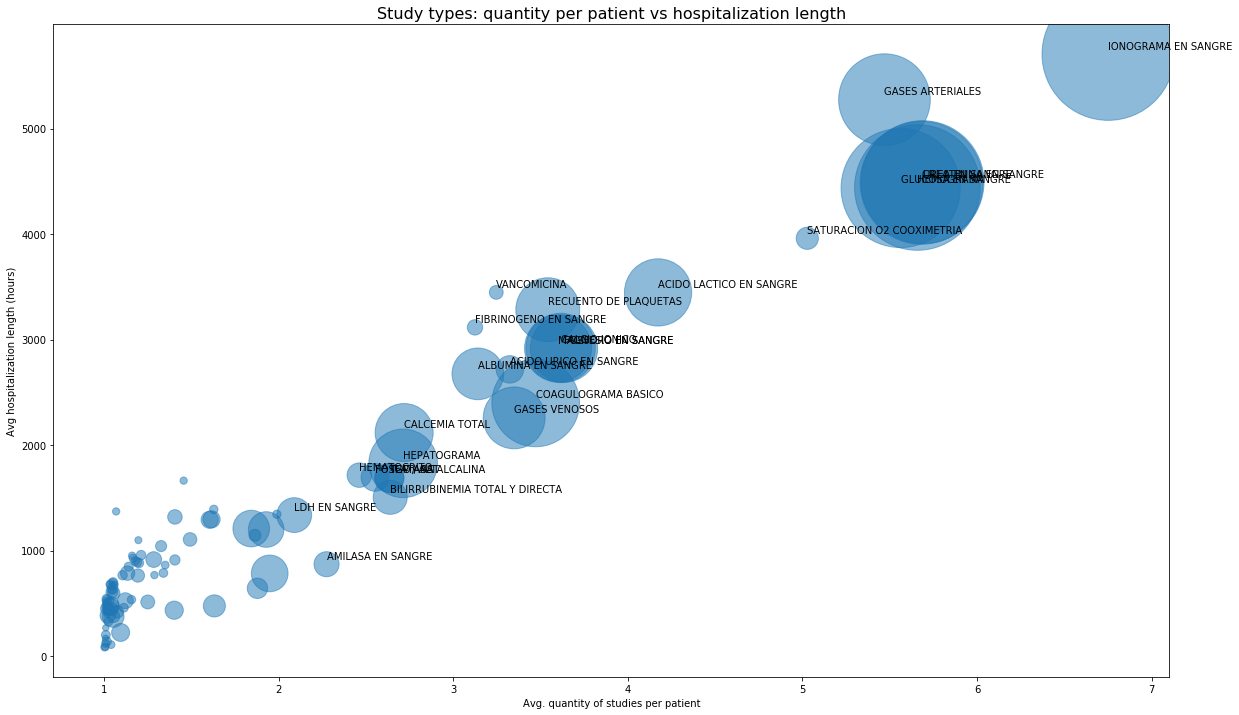

In [83]:
plt.figure(figsize=(20,12))
x = tmp['avg_labos_requested_per_hosp']
y = tmp['avg_length']
s = [n/20 for n in tmp['labo_id']]

plt.scatter(x=x,y=y,s=s,alpha=0.5)
plt.xlabel('Avg. quantity of studies per patient')
plt.ylabel('Avg hospitalization length (hours)')
plt.title('Study types: quantity per patient vs hospitalization length', fontsize=16)


for i, label in enumerate(tmp.index):
    if x[i] > 2:
        plt.gca().annotate(label, (x[i], y[i]+50),fontsize=10)

## 5) Surgeries dataset

This dataset contains information regarding  performed at the hospital. Each row represent a different surgery and it is linked to a clinic history id, an admission id and a date. 

##### Sample view of the surgeries dataset

In [84]:
#surgeries = load_parquet('data/parquet_data','surgeries')
surgeries= db['surgeries']
surgeries.head()

,operating_room,surgery_date,surgery_weekday,surgery_year_month,surgery_scheduled_time,admission_id,surgery_type,G.A.P.,surgery_id,origin,patient_id,gender,age,discharge_type,entity_description,diagnosis,scheduled_surgery,actual_surgery,surgery_physician,dependency,anesthesia_type,ASA,antisepsia,prophylactic_ATB,dosis_mg,bed_request,hemotherapy,hemo_ok,x_ray,cardiologist,supplies,supplies_ok,protocol_no,service_description,surgery_code,sector_bed,specialization,estimated_duration,surgery_startime,surgery_endtime,surgery_delay,hospitalization_date,specialization_code,entry_time,exit_time,anesthesia_startime,anesthesia_endtime,post_surgery_condition,admission_date,admission_time,discharge_date,discharge_time,re_surgery,no_of_surgeries,hips_surgery,injury_condition,pre_surgery_duration,surgery_duration,post_surgery_duration,surgery_prep_duration,re_admission_id,antibiotic,seeding,no._of_assistans,anesthetist_id,no._of_pregnancies,no._births,no._of_cesarean,nulliparous,new_born_id_rel,new_born_admission_id,new_born_weight,new_born_gestation_age,new_born_alive,bact_positive,scheduled_surgery_done
0,7,2017-01-01,Dom,201701,21:00:00,466496-1,No Programada,False,137489,URG,654803-6,F,43,Alta Medica,OSPIT - O.S. PERS. IND. TEXTIL,APENDICITIS AGUDA,"APENDICECTOMIA NOCTURNA, LAPAROSCOPICA","APENDICECTOMIA NOCTURNA, LAPAROSCOPICA",SOTELO JUAN MANUEL,Interno,General,1.0,IODOPOVIDONA,AMPICILINA-SULBACTAM,1500.0,False,False,False,False,False,False,False,283049,CIRUGIA GENERAL,58052403,0,CIRUGIA GENERAL ADULTOS,34,21:41:00,22:15:00,30,None,PROC,21:09:00,22:34:00,21:35:00,22:23:00,INT,2017-01-01,14:51:00,2017-01-02,19:08:00,0.0,1,False,Limpia,6,34,19,25,None,-1.0,-1.0,1,56356,0,0,0,None,NaN,None,NaN,0,None,NaN,True
1,7,2017-01-01,Dom,201701,10:39:00,466420-6,No Programada,False,137486,INT Urg,3714524-8,M,60,Propia Voluntad,OBSBA CIUDAD DE BS. AS. OBRA SOCIAL DE LA,EMBOLIA Y TROMBOSIS DE ARTERIAS DE LOS MIEMBRO...,"VASOS PERIFERICOS,BY PASS DE (FEMORO POPLITEO","VASOS PERIFERICOS,BY PASS DE (FEMORO POPLITEO",DALESSIO IVANNA,Interno,General,4.0,IODOPOVIDONA,CEFAZOLINA,2000.0,False,False,False,False,False,True,True,283046,CIRUGIA VASCULAR PERIFERICA,7060300,0,CIRUGIA VASCULAR PERIFERICA,340,11:04:00,16:44:00,15,None,CIVP,10:39:00,16:47:00,10:46:00,16:46:00,INT,2016-12-30,17:37:00,2017-01-20,15:46:00,-1.0,2,False,Limpia,18,340,3,25,None,-1.0,-1.0,2,76045,0,0,0,None,NaN,None,NaN,0,None,NaN,True
2,19,2017-01-01,Dom,201701,12:49:00,466453-8,No Programada,False,137488,URG,3702558-4,F,20,Alta Medica,OBSBA CIUDAD DE BS. AS. OBRA SOCIAL DE LA,PARTO UNICO ESPONTANEO,PARTO,PARTO,QUIROZ CARINA MAGDALENA,Interno,Peridural,1.0,IODOPOVIDONA,None,0.0,False,False,False,False,False,True,False,283048,OBSTETRICIA,11040100,0,OBSTETRICIA,20,13:24:00,13:44:00,30,None,OBST,12:49:00,13:47:00,13:10:00,13:45:00,INT,2016-12-31,13:31:00,2017-01-03,12:01:00,0.0,1,False,Limpia,14,20,3,25,None,0.0,-1.0,2,50028,1,1,0,False,NaN,None,NaN,0,None,NaN,True
3,20,2017-01-01,Dom,201701,12:00:00,466487-3,No Programada,False,137487,URG,3383289-1,F,30,Alta Medica,OSPEDYC -OS.PERS.ENT. DEPORTIVAS Y CIVILES,PARTO UNICO ESPONTANEO,PARTO,PARTO,QUIROZ CARINA MAGDALENA,Interno,Sin Anestesia,1.0,IODOPOVIDONA,None,0.0,False,False,False,False,False,True,False,283047,OBSTETRICIA,11040100,0,OBSTETRICIA,50,12:10:00,13:00:00,0,None,OBST,12:00:00,13:09:00,12:05:00,13:05:00,INT,2017-01-01,11:14:00,2017-01-03,12:06:00,0.0,1,False,Limpia-Contaminada,0,50,9,25,None,NaN,NaN,1,None,2,1,0,False,NaN,None,NaN,0,None,NaN,True
4,20,2017-01-01,Dom,201701,08:02:00,466475-6,No Programada,False,137485,URG,3690640-7,F,22,Alta Medica,OSUTHGRA O.S PERSONAL GASTRONOMICO,TRABAJO UNICO ESPONTANEO,PARTO,PARTO,QUIROZ CARINA MAGDALENA,Interno,Peridural,1.0,IODOPOVIDONA,AMPICILINA,2.0,False,False,False,False,False,False,False,283045,OBSTETRICIA,11040100,0,OBSTETRICIA,76,08:18:00,09:34:00,15,None,OBST,08:02:00,09:40:00,08:10:00,09:36:00,INT,2017-01-01,06:39:37,2017-01-03,11:12:00,0.0,1,False,Limpia-Contaminada,8,76,6,25,None,-1

##### Available data

In [85]:
for col in surgeries.columns:
    print(col)

operating_room
surgery_date
surgery_weekday
surgery_year_month
surgery_scheduled_time
admission_id
surgery_type
G.A.P.
surgery_id
origin
patient_id
gender
age
discharge_type
entity_description
diagnosis
scheduled_surgery
actual_surgery
surgery_physician
dependency
anesthesia_type
ASA
antisepsia
prophylactic_ATB
dosis_mg
bed_request
hemotherapy
hemo_ok
x_ray
cardiologist
supplies
supplies_ok
protocol_no
service_description
surgery_code
sector_bed
specialization
estimated_duration
surgery_startime
surgery_endtime
surgery_delay
hospitalization_date
specialization_code
entry_time
exit_time
anesthesia_startime
anesthesia_endtime
post_surgery_condition
admission_date
admission_time
discharge_date
discharge_time
re_surgery
no_of_surgeries
hips_surgery
injury_condition
pre_surgery_duration
surgery_duration
post_surgery_duration
surgery_prep_duration
re_admission_id
antibiotic
seeding
no._of_assistans
anesthetist_id
no._of_pregnancies
no._births
no._of_cesarean
nulliparous
new_born_id_rel
new_b

##### Total no. of surgeries in dataset

In [86]:
surgeries.shape

(66750, 76)

##### No. of surgeries per patient

In [87]:
surgeries['surgery_id'].nunique()/hospitalizations['patient_id'].nunique()

1.0299894008354635

Text(0.5,1,'Number of surgeries per admission')

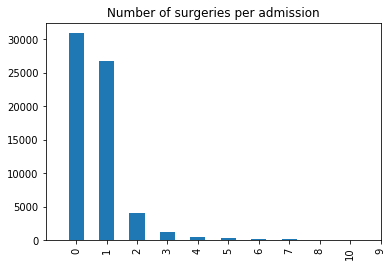

In [88]:
mdf = hospitalizations.merge(surgeries, 
                       how='left',
                       on=['patient_id','admission_id']
                      )
mdf.groupby('patient_id').nunique()['surgery_id'].value_counts().plot.bar()
plt.gca().set_xlim(-1,10)
plt.gca().set_title('Number of surgeries per admission')

##### No. of surgeries per admission

In [89]:
surgeries['surgery_id'].nunique()/hospitalizations.admission_id.nunique()

0.7533059735522116

Text(0.5,1,'Numbmer of surgeries per admission')

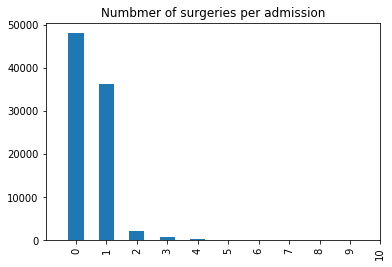

In [90]:
mdf.groupby('admission_id').nunique()['surgery_id'].value_counts().plot.bar()
plt.gca().set_xlim(-1,10)
plt.gca().set_title('Numbmer of surgeries per admission')

##### Avg. surgery duration (minutes)

In [91]:
np.mean(surgeries.surgery_duration), np.median(surgeries.surgery_duration)

(49.03122097378277, 30.0)

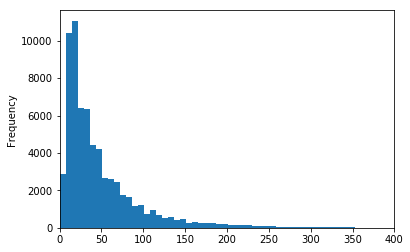

In [92]:
surgeries.surgery_duration.plot.hist(bins= 200,xlim=(0,400))

##### Avg. surgery delay

In [93]:
np.mean(surgeries.surgery_delay), np.median(surgeries.surgery_delay)

(68.05955056179775, 45.0)

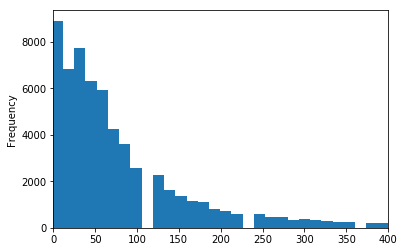

In [94]:
surgeries.surgery_delay.plot.hist(bins=200,xlim=(0,400))

##### Relationship between surgiers and hospitalizations

There is no clear relationship between surgeries and hospitalizations. Neither between surgery duration and hospitalization length. In terms of number of surgeries per admission, there seems to be a linear positive relationship but only for those patients with 20+ surgeries which are the least.

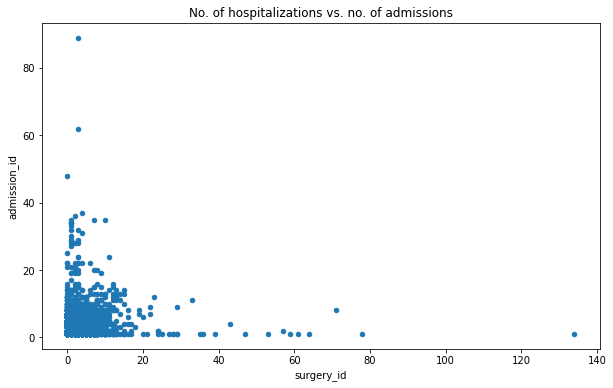

In [95]:
mdf.groupby('patient_id').aggregate({'surgery_id': 'nunique',
                                   'admission_id': 'nunique'}).plot.scatter(x='surgery_id',
                                                                y='admission_id',
                                                                title='No. of hospitalizations vs. no. of admissions',
                                                                figsize=(10,6))

In [96]:
surgeries = surgeries.merge(hospitalizations[['length','patient_id','admission_id']],
                            how='left', on=['patient_id','admission_id'])

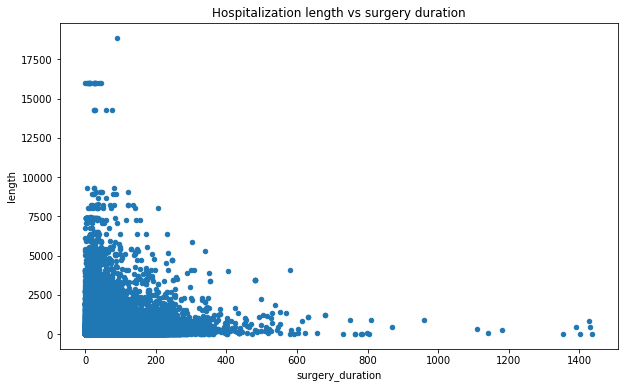

In [97]:
surgeries.plot.scatter(x='surgery_duration',
                       y='length',
                       title='Hospitalization length vs surgery duration', 
                       figsize=(10,6))

Text(0,0.5,'Log(Hours)')

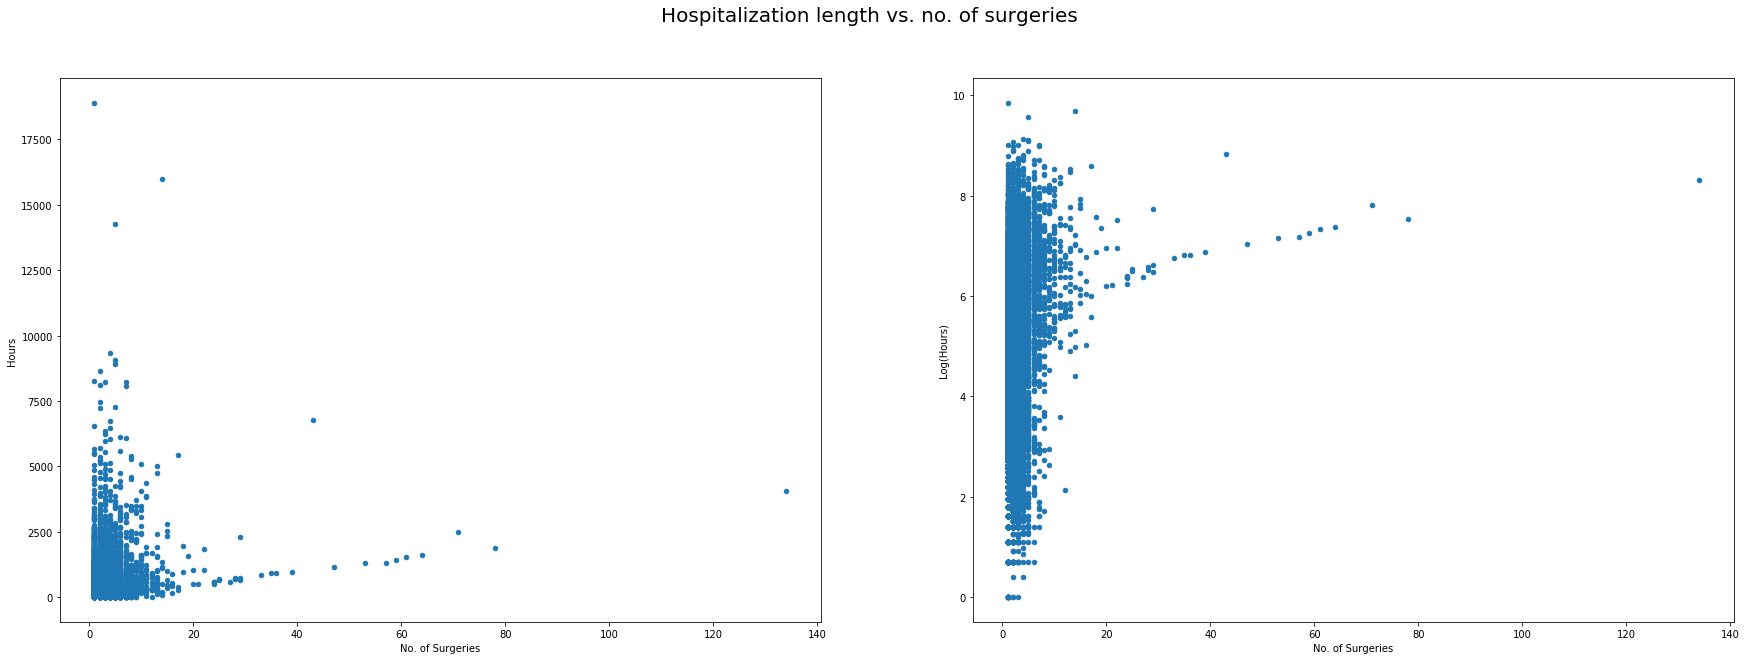

In [98]:
gdf = surgeries.groupby(by='patient_id').agg({'surgery_id': 'nunique',
                                        'length': 'mean'})
gdf['log_length'] = np.log(gdf['length'])
gdf['log_surgeries'] = np.log(gdf['surgery_id'])
gdf['sqrt_surgeries'] = np.sqrt(gdf['surgery_id'])


fig, axs = plt.subplots(1,2,figsize=(30,10))
fig.suptitle('Hospitalization length vs. no. of surgeries', fontsize=20)

gdf.plot.scatter(x='surgery_id',
                 y='length',
                  ax=axs[0])
axs[0].set_xlabel('No. of Surgeries')
axs[0].set_ylabel('Hours')

gdf.plot.scatter(x='surgery_id',
                 y='log_length',
                 ax=axs[1])
axs[1].set_xlabel('No. of Surgeries')
axs[1].set_ylabel('Log(Hours)')

##### Surgeries conditions and hospitalization length

Surgery conditions which range from type of intervention to injury condition are strongly related with hospitalization length, as illustrated by the figures below.

Certain surgeries seem to have longer hospitalization time than others. While this is true, ee cannot say anything about the direction of the relationship. It can be either that certain interventions require patients to stay longer hospitalized or that patients that are in more difficult health conditions (and thus have longer hospitalization periods) usually require certain types of interventions.

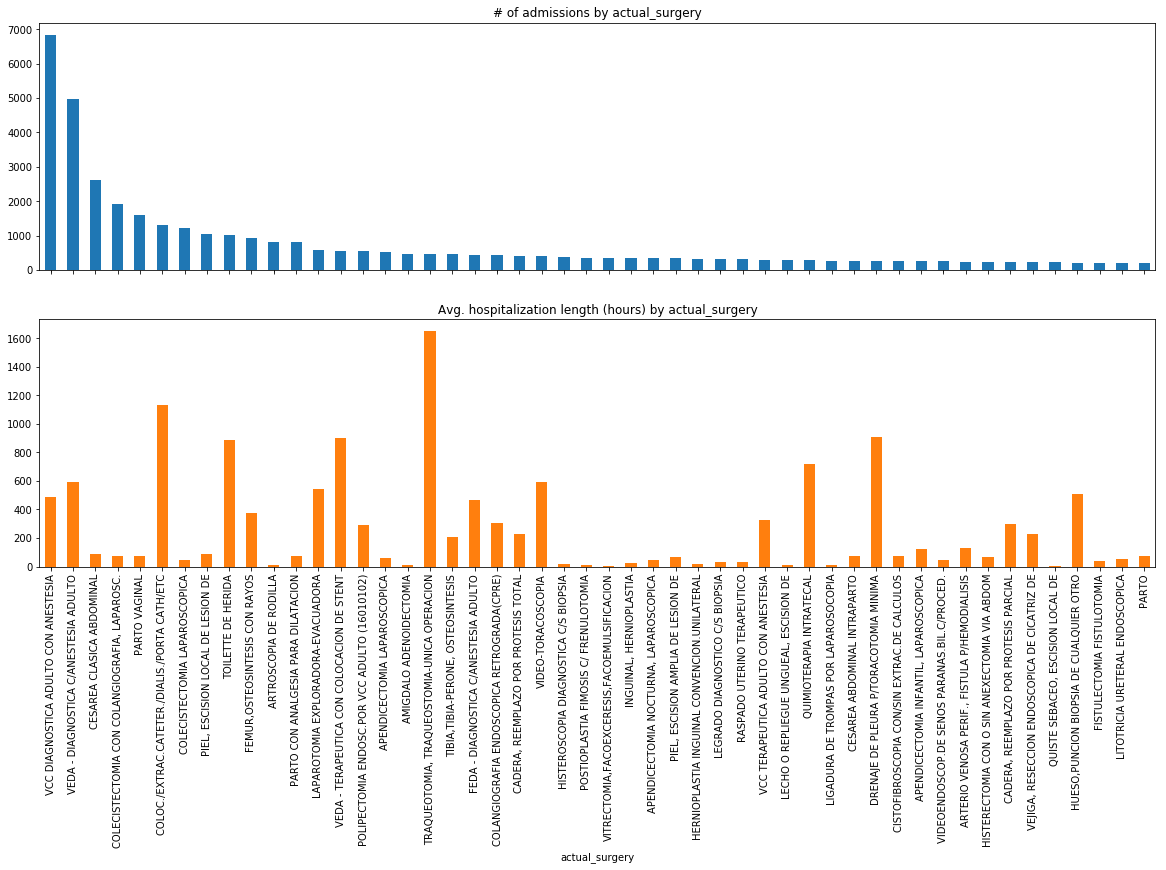

In [99]:
plot_top_categories(surgeries,
                    'actual_surgery',
                    50,
                    figsize=(20,10),
                    title='Top 50 surgeries')

Same thing happens with service description

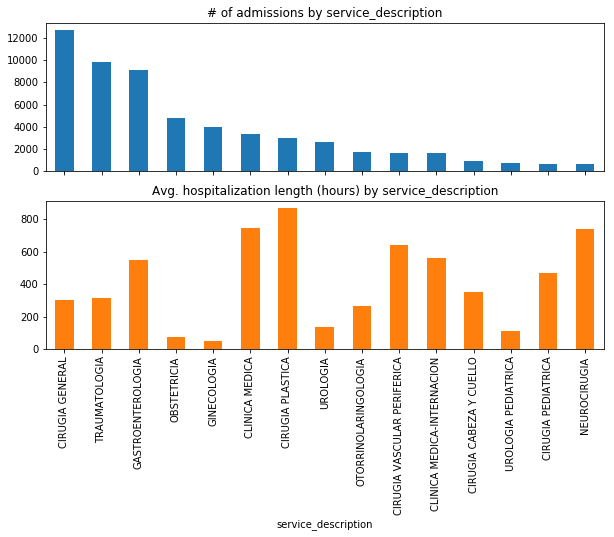

In [102]:
plot_top_categories(surgeries,
                          'service_description',
                          15,
                          figsize=(10,6), 
                          title='Surgeries by sector')

It also can be seen that patients with unscheduled surgeries on average, spend longer periods hospitalized, which seems quite reasonable.

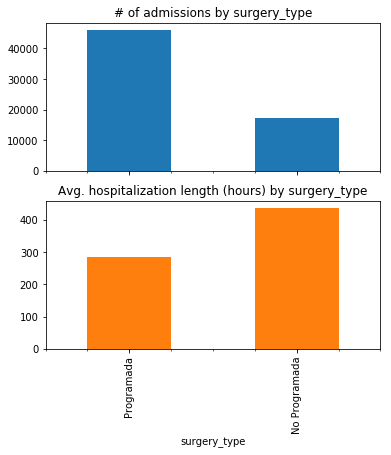

In [100]:
plot_top_categories(surgeries,
                    'surgery_type',
                    50,
                    figsize=(6,6),
                    title='Top 50 surgeries')

Finally injury conditions have a notorious relationship with hospitalization length. As we would expect, patients with contaminated injuries, spend longer times hospitalized than those without this kind of issues. 

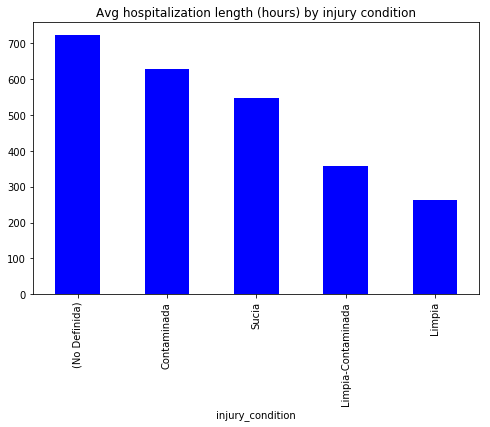

In [104]:
plot_top_categories_mean(surgeries,
                         'injury_condition',
                         n=50,
                         to_plot='length',
                         figsize=(8,5),
                         title='Avg hospitalization length (hours) by injury condition')

##### Surgery times and hospitalization length

We aimed to find some interesting relationships between the duration of the intervention and patient hospitalization lenght, however this is not the case, as the figures below illustrates:

In [105]:
duration_cols = ['pre_surgery_duration', 'surgery_duration','post_surgery_duration']

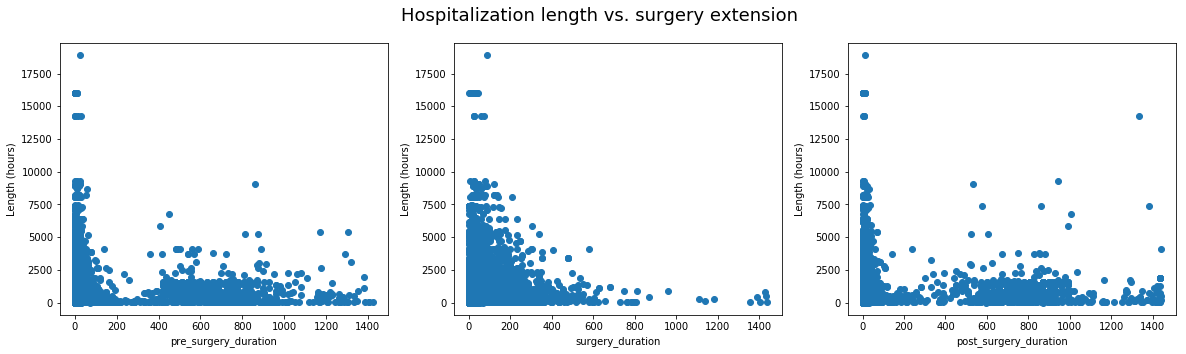

In [106]:
fig, axs = plt.subplots(1,len(duration_cols), figsize=(20,5))
fig.suptitle('Hospitalization length vs. surgery extension', fontsize=18)
for i,col in enumerate(duration_cols):
    axs[i].scatter(x=surgeries[col], y=surgeries.length)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Length (hours)')


#surgeries.plot.scatter(x='post_surgery_duration',y='length')

## 6) Sector admissions dataset

This dataset contains information regarding patients movements across different hospital sectors. Each row represents an admission to a particular sector and it is associated to a patient id and an admission id.

In [107]:
sectors= db['sectors_admissions']
sectors.head()

,admission_id,patient_id,sector_admission_date,sector_admission_time,sector_code,category,sector_admission_datetime
0,466470-1,3526141-4,2017-01-01,02:00:00,EME,I,2017-01-01 02:00:00
1,466470-1,3526141-4,2017-01-01,07:53:00,T16,C,2017-01-01 07:53:00
2,466471-4,3714597-2,2017-01-01,02:00:00,EME,I,2017-01-01 02:00:00
3,466471-4,3714597-2,2017-01-01,06:38:00,UCO,I,2017-01-01 06:38:00
4,466472-7,3714595-2,2017-01-01,02:00:00,T10,C,2017-01-01 02:00:00


##### Avg. no. of sectors by patient

In [108]:
sectors.admission_id.count()/sectors.patient_id.nunique()

2.3550727951825596

#####  Avg. no. of sectors per admission

In [109]:
sectors.admission_id.count()/sectors.admission_id.nunique()

1.7179635457790727

##### Sectors 

There seem to be some sectors that few admissions and at the same time longer hospitalization periods. This is particular notorious for `UCR` sector (cardiac services). We suspect that there might be a shortage of bed capacity in this particular sector where patients are usually in complciated heatlh conditions that require longer times hospitalized.

In [ ]:
sectors = sectors.merge(hospitalizations,how='left',on='admission_id')

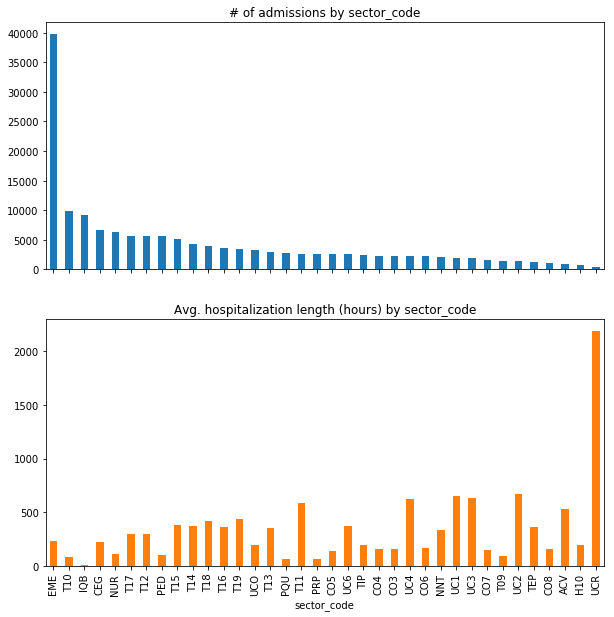

In [128]:
plot_top_categories(sectors,
                          categorical='sector_code',
                          n=50,
                         figsize=(10,10),
                        title='No. of sector admissions by sector')

##### Relationship between no. of sectors per admission and hospitalization length

It seems to be a clear link between the no. of sectors a patient visits during his hospitalization with the time he spends hospitalized.

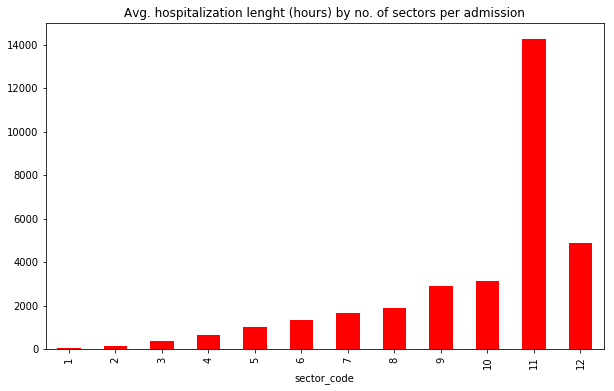

In [126]:
sectors.groupby(by=['patient_id_x',
                    'admission_id']
               ).aggregate(
                    {'sector_code': 'nunique',
                    'length': 'mean'}
                    ).groupby('sector_code').mean().plot.bar(
                                    title='Avg. hospitalization lenght (hours) by no. of sectors per admission',
                                    color='red',
                                    figsize=(10,6),
                                    legend=False)